# <span style = "color: red" > Final Project: Predict Calorie Expenditure

I have choosen a Kaggle competition as a final project.
https://www.kaggle.com/competitions/playground-series-s5e5/overview

1. Kaggle competitions allow easy access to intresting and challenging data sets.
2. Participating on the competition gives me additional motivation to spend my time on the project.

3. I will not have a look at any Kaggle notebooks. Task is to solve the problem on my own.


## <span style = "color: red" > Problem

Goal is to predict the calory consumption for a workout. Different body metrics, like e.g. `Sex`, `Age` and `Heart_Rate` or also the `Duration` of the workout can be used as predictor.

Diverse machine learning techniques can be utilized to solve this problem. However, as the dataset is quite big it allows to use a very flexible approach like Deep Learning. A big dataset with many observations and limited numbers of features is represented by a multidimension space with a dense cloud of observation points. This allows a very precise description of the true function *f* with a low risk of overfitting.

Furthermore, Kaggle website says that "The dataset for this competition (both train and test) was generated from a deep learning model trained on the Calories Burnt Prediction dataset." This also tells that using a Deep Learning algorithmus should be viable approach to solve the problem.

In [2]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


In [3]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

playground_series_s5e5_path = kagglehub.competition_download('playground-series-s5e5')

print('Data source import complete.')


100%|██████████| 12.5M/12.5M [00:00<00:00, 64.8MB/s]

Extracting files...


Data source import complete.


In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os
import random
import tensorflow as tf
from google.colab import drive
drive.mount('/content/drive')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Mounted at /content/drive


## <span style = "color: red" > Data Description
- Trainings dataset consists of 750.000 observations
- Test dataset consists of of 250.000 observations

Features are:
- `Sex`: categorical with 2 unordered categories: "female" and "male"
- `Age`: continous, ratio-scaled, 0 digits
- `Height`: continous, ratio-scaled, 0 digits
- `Weight`: continous, ratio-scaled, 0 digits
- `Duration`: continous, ratio-scaled, 0 digits
- `Heart_Rate`: continous, ratio-scaled, 0 digits
- `Body_Temp`: continous, interval-scaled, 1 digit

Target is:
- `Calories`: continous, ratio-scaled, 0 digits

No missing values are in the dataset.

In [5]:
os.listdir(playground_series_s5e5_path)

['test.csv', 'train.csv', 'sample_submission.csv']

In [6]:
train_all = pd.read_csv(os.path.join( playground_series_s5e5_path, 'train.csv'), index_col=0)
test = pd.read_csv(os.path.join(playground_series_s5e5_path, 'test.csv'), index_col=0)

In [7]:
train_all.head(5)

Sex  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  Calories
id                                                                        
0     male   36   189.0    82.0      26.0       101.0       41.0     150.0
1   female   64   163.0    60.0       8.0        85.0       39.7      34.0
2   female   51   161.0    64.0       7.0        84.0       39.8      29.0
3     male   20   192.0    90.0      25.0       105.0       40.7     140.0
4   female   38   166.0    61.0      25.0       102.0       40.6     146.0

In [8]:
train_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 750000 entries, 0 to 749999
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Sex         750000 non-null  object 
 1   Age         750000 non-null  int64  
 2   Height      750000 non-null  float64
 3   Weight      750000 non-null  float64
 4   Duration    750000 non-null  float64
 5   Heart_Rate  750000 non-null  float64
 6   Body_Temp   750000 non-null  float64
 7   Calories    750000 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 51.5+ MB


In [9]:
train_all.describe()

Age         Height         Weight       Duration  \
count  750000.000000  750000.000000  750000.000000  750000.000000   
mean       41.420404     174.697685      75.145668      15.421015   
std        15.175049      12.824496      13.982704       8.354095   
min        20.000000     126.000000      36.000000       1.000000   
25%        28.000000     164.000000      63.000000       8.000000   
50%        40.000000     174.000000      74.000000      15.000000   
75%        52.000000     185.000000      87.000000      23.000000   
max        79.000000     222.000000     132.000000      30.000000   

          Heart_Rate      Body_Temp       Calories  
count  750000.000000  750000.000000  750000.000000  
mean       95.483995      40.036253      88.282781  
std         9.449845       0.779875      62.395349  
min        67.000000      37.100000       1.000000  
25%        88.000000      39.600000      34.000000  
50%        95.000000      40.300000      77.000000  
75%       103.000000      40.700000     136.000000  
max       128.000000      41.500000     314.000000

In [10]:
test.head()

Sex  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
id                                                                  
750000    male   45   177.0    81.0       7.0        87.0       39.8
750001    male   26   200.0    97.0      20.0       101.0       40.5
750002  female   29   188.0    85.0      16.0       102.0       40.4
750003  female   39   172.0    73.0      20.0       107.0       40.6
750004  female   30   173.0    67.0      16.0        94.0       40.5

In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 250000 entries, 750000 to 999999
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Sex         250000 non-null  object 
 1   Age         250000 non-null  int64  
 2   Height      250000 non-null  float64
 3   Weight      250000 non-null  float64
 4   Duration    250000 non-null  float64
 5   Heart_Rate  250000 non-null  float64
 6   Body_Temp   250000 non-null  float64
dtypes: float64(5), int64(1), object(1)
memory usage: 15.3+ MB


In [12]:
test.describe()

Age         Height         Weight       Duration  \
count  250000.000000  250000.000000  250000.000000  250000.000000   
mean       41.452464     174.725624      75.147712      15.415428   
std        15.177769      12.822039      13.979513       8.349133   
min        20.000000     127.000000      39.000000       1.000000   
25%        28.000000     164.000000      63.000000       8.000000   
50%        40.000000     174.000000      74.000000      15.000000   
75%        52.000000     185.000000      87.000000      23.000000   
max        79.000000     219.000000     126.000000      30.000000   

          Heart_Rate      Body_Temp  
count  250000.000000  250000.000000  
mean       95.479084      40.036093  
std         9.450161       0.778448  
min        67.000000      37.100000  
25%        88.000000      39.600000  
50%        95.000000      40.300000  
75%       103.000000      40.600000  
max       128.000000      41.500000

In [13]:
len(train_all), len(test)

(750000, 250000)

In [14]:
train_all['Sex'].unique(), test['Sex'].unique()

(array(['male', 'female'], dtype=object),
 array(['male', 'female'], dtype=object))

## <span style = "color: red" > Exploratory Data Analysis (EDA) - Inspect, Visualize, and Clean the Data

### <span style = "color: red" > Data Distribution

Distribution of each parameter is plotted in a histogram for training (blue) and test data (orange).

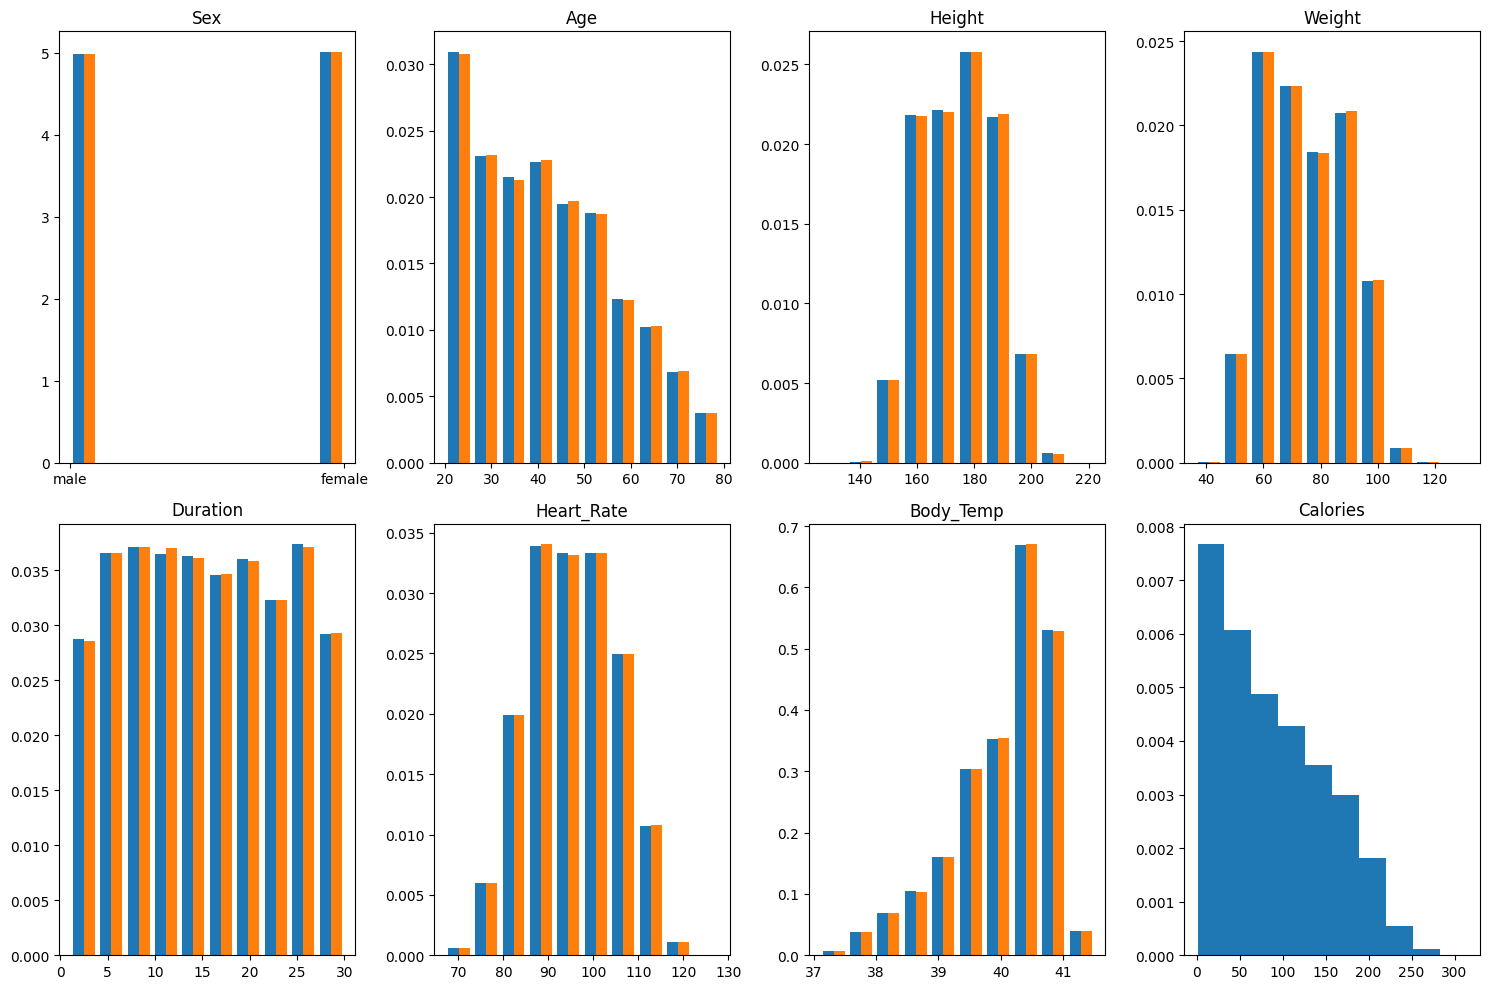

In [15]:
nrows = 2
ncols = 4
fig, ax = plt.subplots(nrows, ncols, figsize=(15, 10))

for index in range((train_all.shape[1])):

  parameter = train_all.columns[index]


  row_index = index // ncols
  col_index = index % ncols

  if index == train_all.shape[1]-1:
    ax[row_index, col_index].hist(train_all[parameter], density = True)
  else:
    ax[row_index, col_index].hist([train_all[parameter],test[parameter]], density = True)

  ax[row_index, col_index].set_title(parameter)


plt.tight_layout()
plt.show()

*Observations*

All features: Distribution of training and test data is visually the same.

- `Sex`: Categories "female" and "male" are balanced.
- `Age`: Right-skewed distribution with minimum age 20.
- `Height`: Bell-shaped distribution with tendency to normal distribution (no test on normal distribution done).
- `Weight`: Bell-shaped distribution with tendency to normal distribution (no test on normal distribution done).
- `Duration`: Tendency to uniform distribution in range 1 to 30 min.
- `Heart_Rate`: Bell-shaped distribution with tendency to normal distribution (no test on normal distribution done).
- `Body_Temp`: Left-skewed distribution in range of 37.1 to 41.5°C.

Target
- `Calories`: Right-skewed distribution in range of 1 to 314 calories.

### <span style = "color: red" > Correlation

**Direct Linear Correlation (Correlation Matrix)**

At first, dataset is analyzed using a correlation matrix in order to understand if linear correlation exists between variables.
Correlation matrices are shown for both sex and both datasets (training and test data).

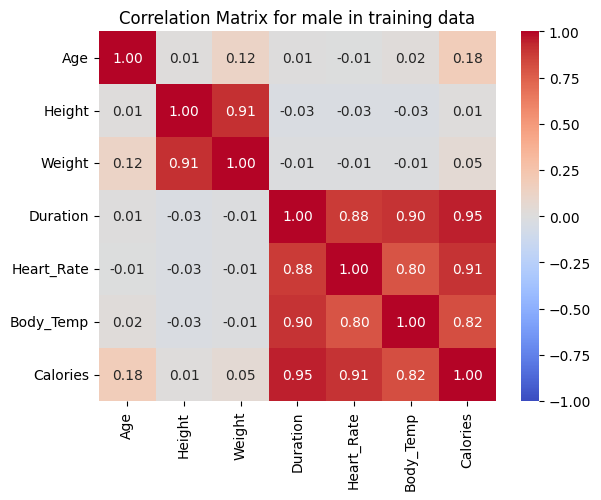

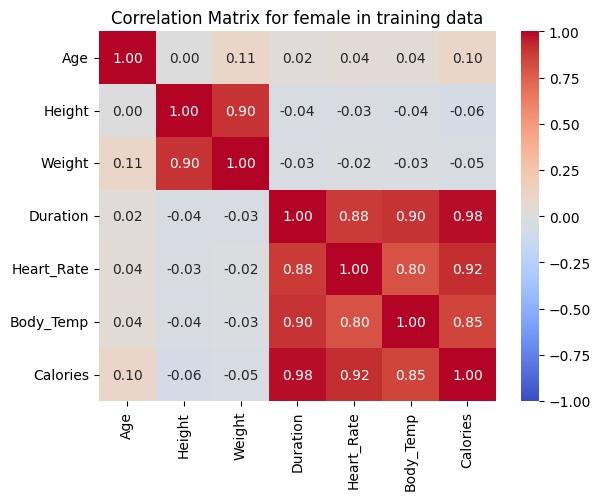

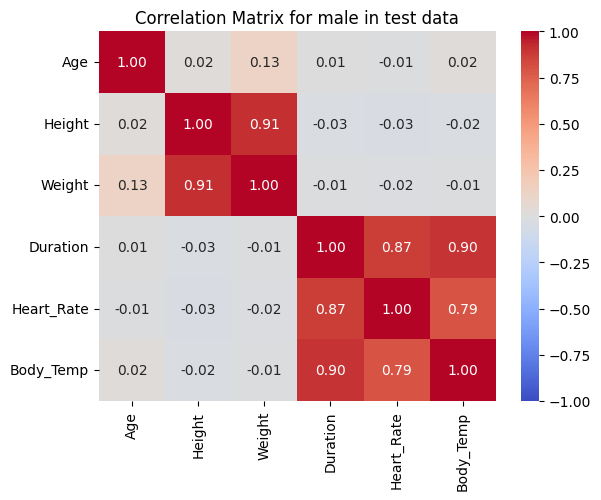

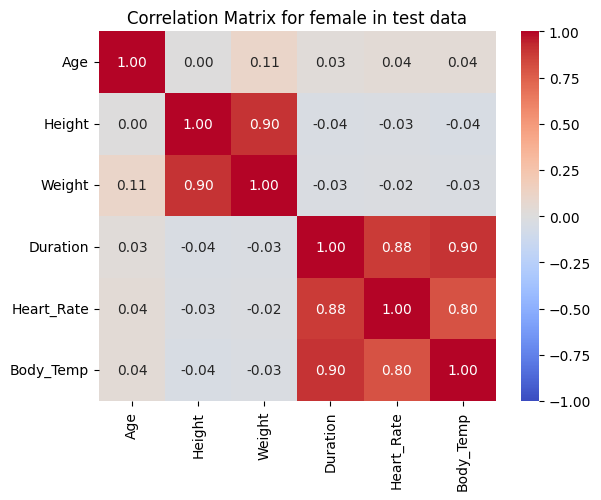

In [16]:
for df, dataset in zip([train_all, test], ["training", "test"]):
  for sex in df['Sex'].unique():
    df_sex = df[df['Sex'] == sex]
    correlation_matrix = df_sex[df_sex['Sex'] == sex].drop(columns = 'Sex').corr()

    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin = -1, vmax = 1)
    plt.title(f'Correlation Matrix for {sex} in {dataset} data')
    plt.show()

*Observations*

Between features:
- Very high positive correlation between `Height` and `Weight`, `Duration` and `Heart_Rate`, `Duration` and `Body_Temp`, `Heart_Rate` and `Body_Temp`
- Very slight positive correlation between `Age` and `Weight`
- No correlation for all other feature-feature pairs

Between features and target `Calories`:
- `Age`: Slight Positive correlation, stronger for "male"
- `Height` and  `Weight`: No correlation.
- `Duration`, `Heart_Rate`, `Body_Temp`: Very high positive correlation.

**Pairplots**

Going beyond direct linear correlation, the relationship between the variables can be further investigated using pairplots.
Pairplots between different numerical variables are only plotted for the training data. Reason is that training and test data look very comparable.
A subset of the entire datset (1%) is used to compile the pairplot as the dataset is too huge for visualization.

In [17]:
k = 100

train_all_size = len(train_all)
index_all = range(train_all_size)

random.seed(321)
train_small_index = random.sample(index_all, int(train_all_size/k))
train_small = train_all.iloc[train_small_index]

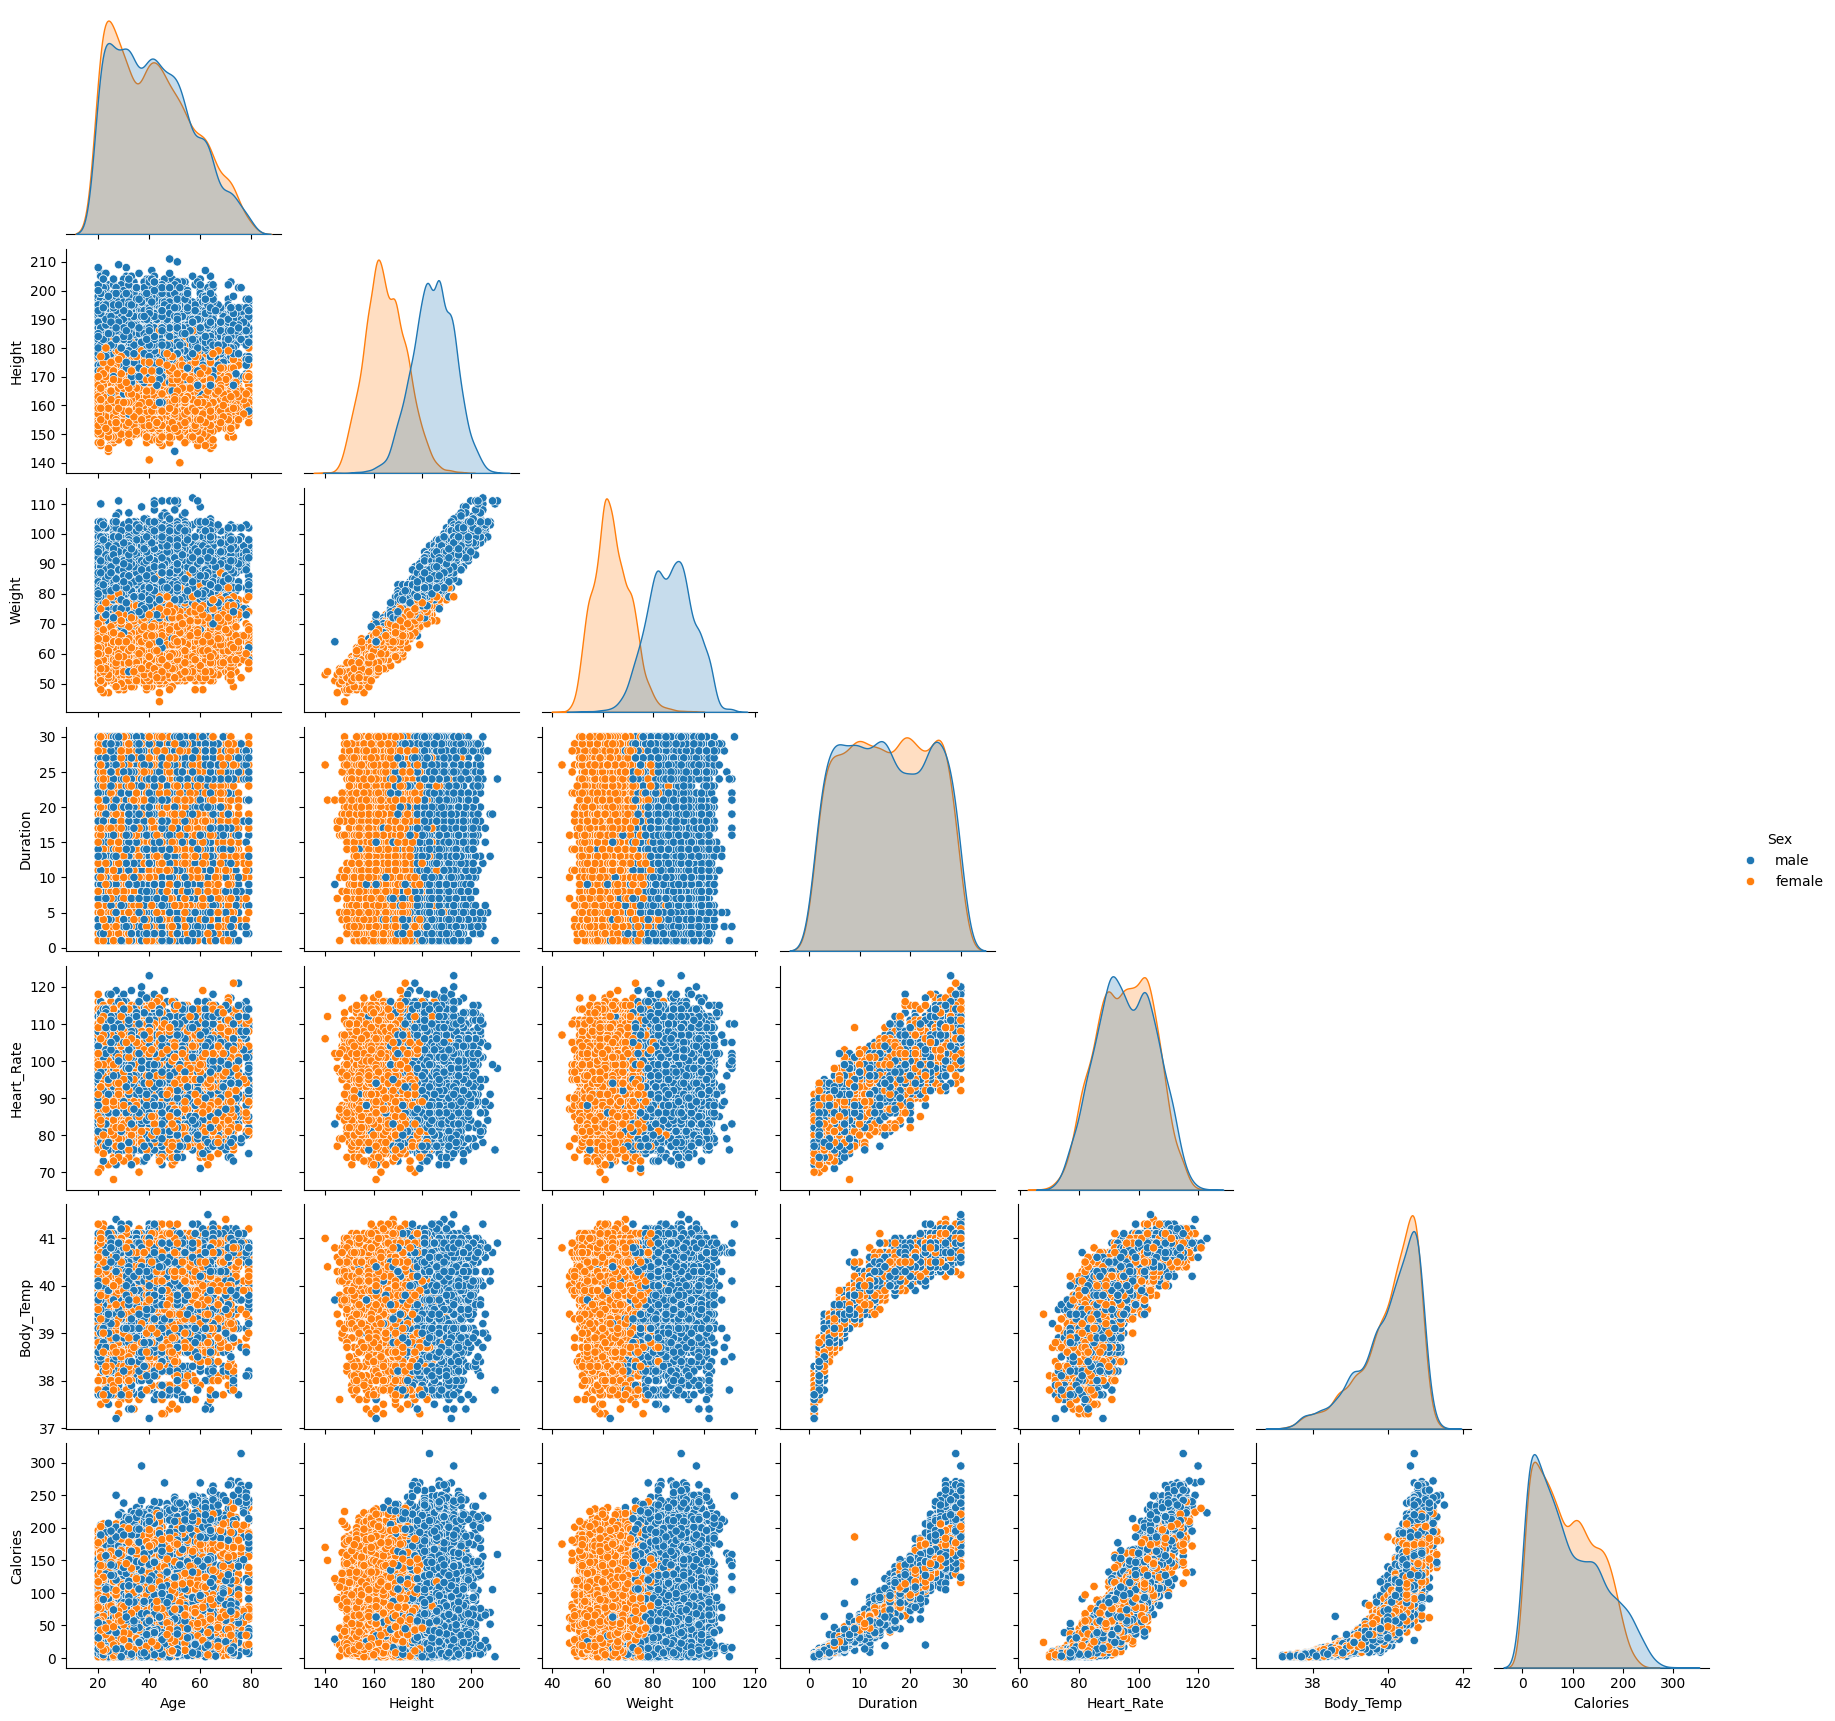

In [18]:
sns.pairplot(train_small, hue = 'Sex', corner=True)

*Observations*

Between features:
- Nearly linear relationship between `Height` and `Weight`. In average "males" have the higher `Height` and `Weight` compared to "females".
- Nearly linear relationship between `Duration` and `Heart_Rate`. `Heart_Rate`is not only affected by the `Duration` of the workout. There seem to be other factors affecting `Heart Rate` as `Heart Rate` data are widespread around the regression line of `Duration` onto `Heart_Rate`.
- The longer the `Duration` the higher `Body_Temp`, but `Body_Temp` reaches a plateau.
- No linear relationship between `Heart_Rate` and `Body_Temp`, but the higher `Heart_Rate`, the higher `Body_Temp`. If `Heart_Rate` is above 100, `Body_Temp` is always above 39°C.


Between features and target `Calories`:
- `Height` and  `Weight`: The highest calories are burnt for "males" having the higher `Height` and  `Weight`.
- Nearly linear relationship between `Duration` and `Calories`. Data of "males" wider spread around the regression line of `Duration` onto `Calories`.
- Nearly linear relationship between `Heart Rate` and `Calories`. Highest `Calories`burnt for "males" with high `Heart Rate`.
- Exponential relationship between `Body_Temp` and `Calories`.

Some single outliers are visible.

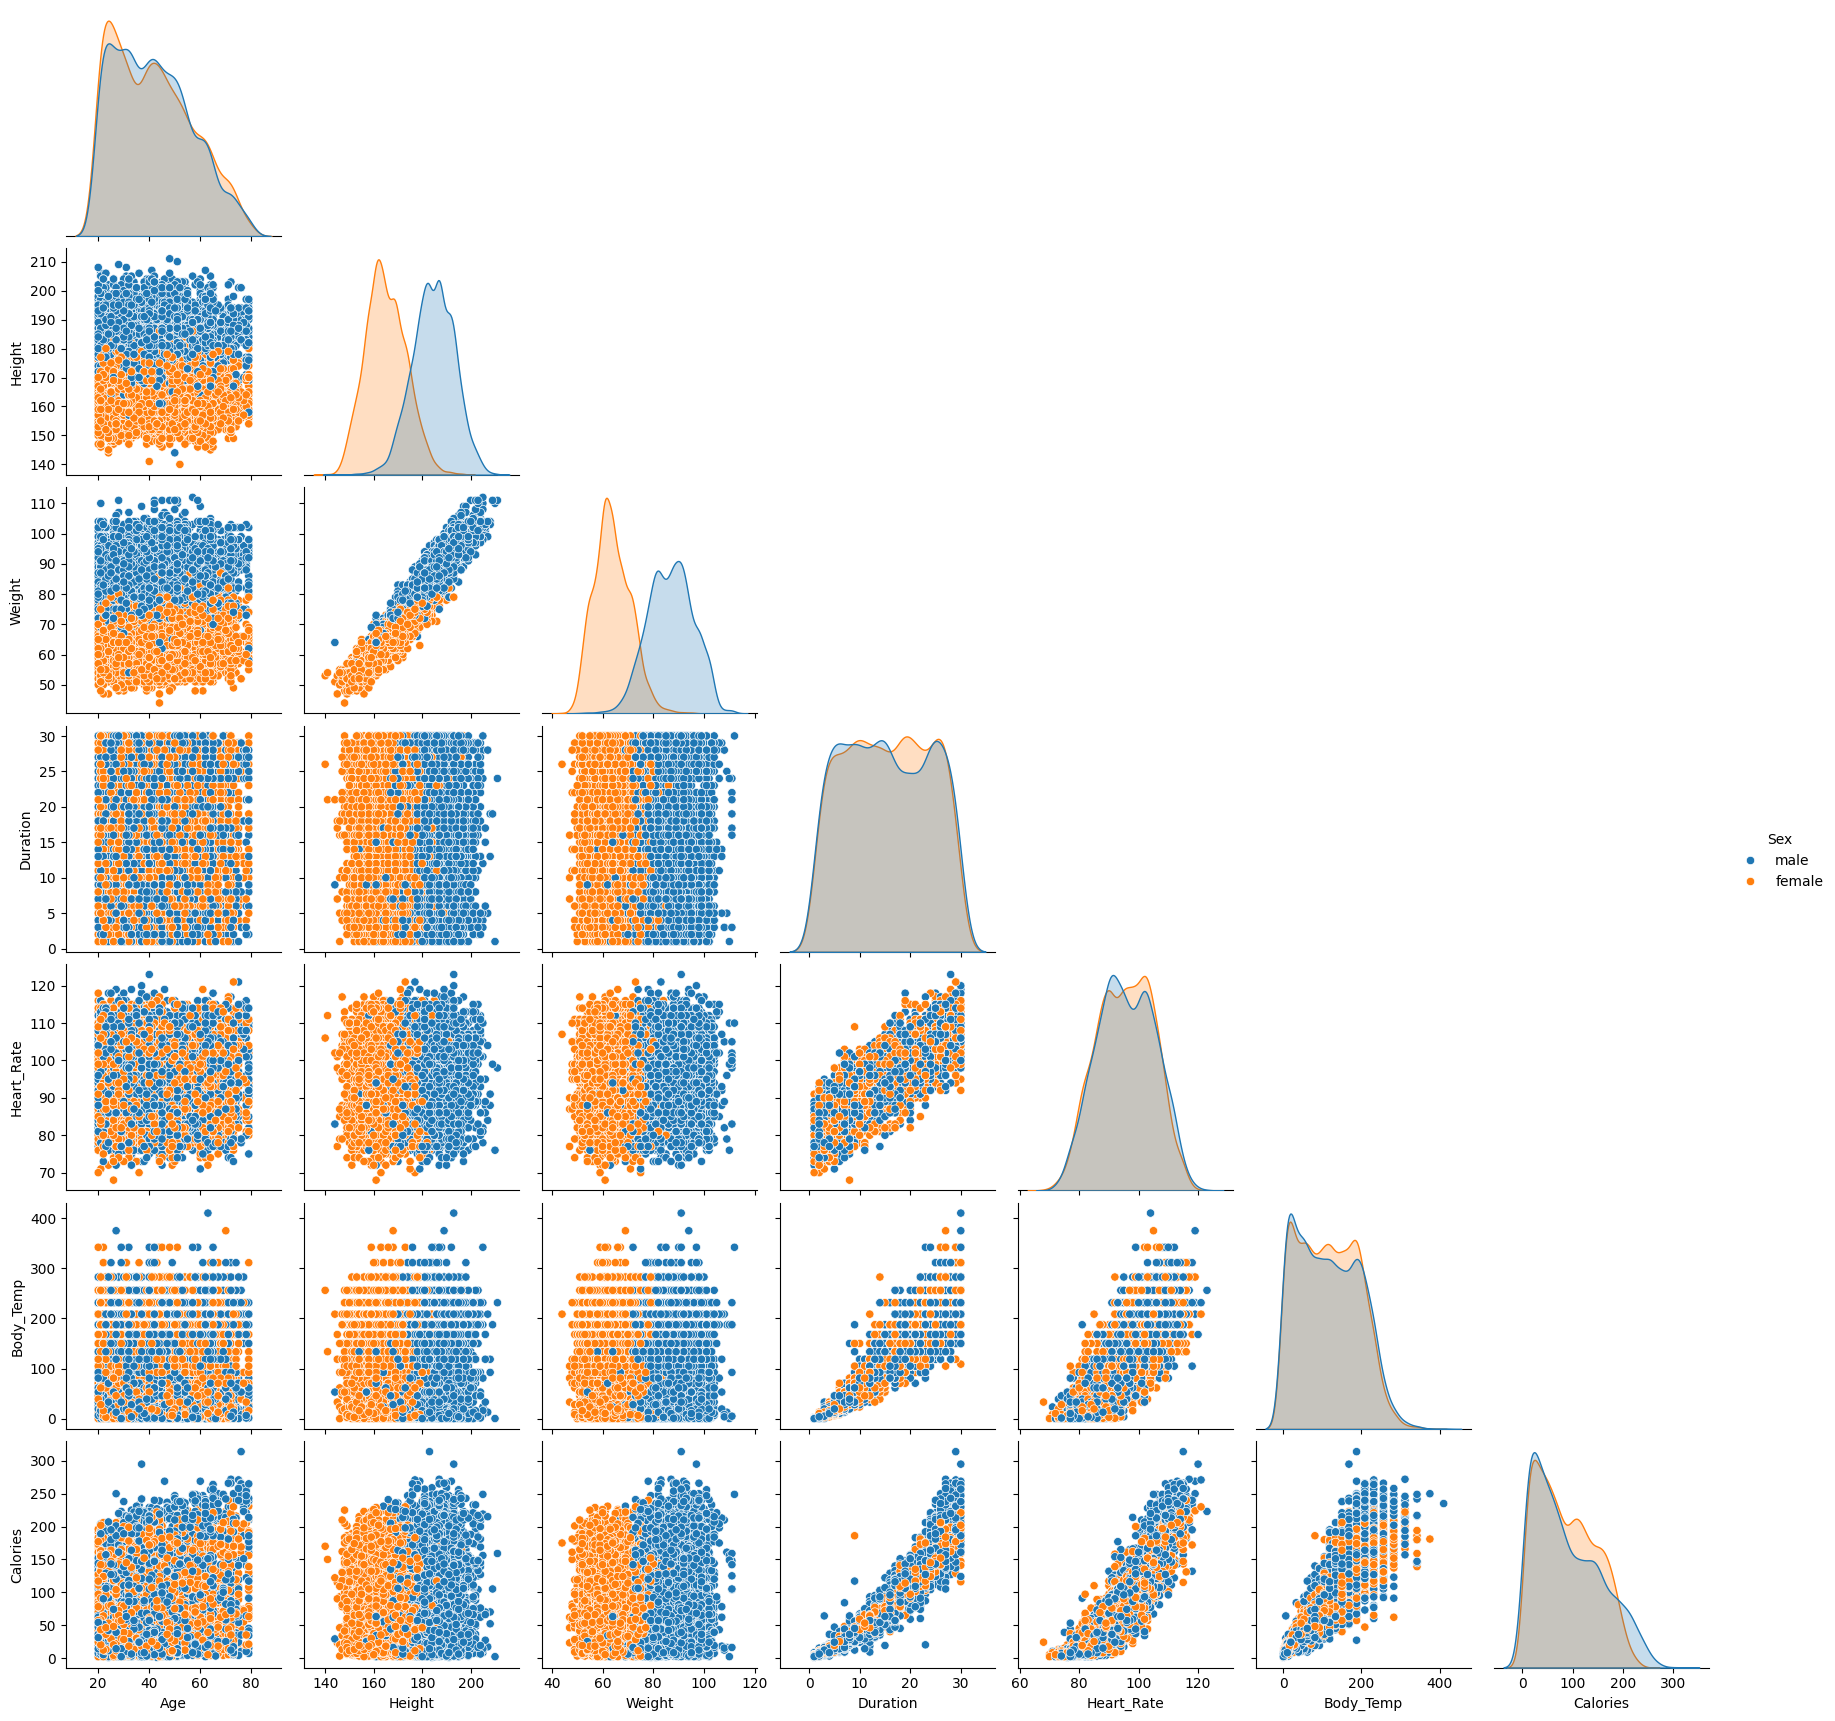

In [19]:
train_small_mod = train_small.copy()
train_small_mod['Body_Temp'] =  (train_small_mod['Body_Temp'] - 37)**4
sns.pairplot(train_small_mod, hue = 'Sex', corner=True)

*Observations*

After transformation of `Body_Temp` using polynom of degree 4, multicollinearity for variables `Duration`, `Heart_Rate` and `Body_Temp` is observed. All these variables are linearly correlated with the target `Calories`.

The impact of `Age` on `Calories`burnt is in more depth investigated for "male", as the correlation between `Age` and `Calories` is slighly stronger for "males" than for "females". By using `Age`as color scatterplots show the relationship between the different features and `Calories`.

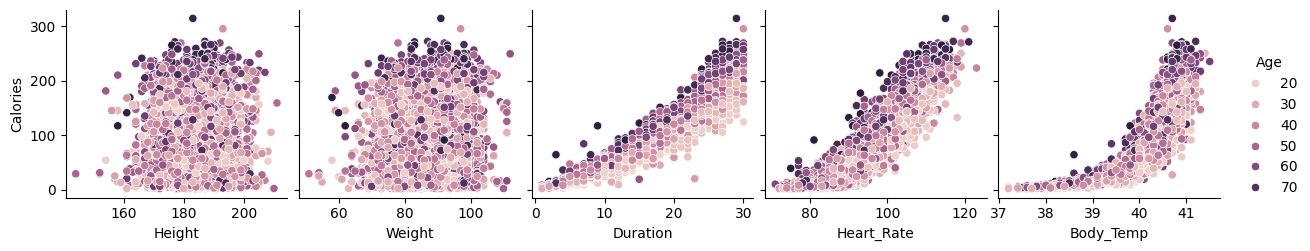

In [20]:
sns.pairplot(train_small[train_small['Sex'] == 'male'], hue = 'Age',
             x_vars=['Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp'],
             y_vars='Calories')

*Observations*

Its is seen that the higher the `Age` the more `Calories` are burnt.


**Summary**

A strong positive correlation exists for the four parameter `Duration`, `Heart_Rate`, `Body_Temp` and `Calories`. After transformation of the variable using a polynom, a linear correlation between these variables is observed.

Therefore, a linear model would be also an approriate tool to fit the data. However, as the dataset is huge, a better performing model could be obtained with a more flexible method.

Besides `Duration`, `Heart_Rate`, `Body_Temp`, also `Sex`and `Age` affect `Calories` burnt slightly.

`Height`and `Weight` do not impact the `Calory` consumption, if at all, then the effet is only very minor. In case of overfitting, it be will tested if a model without these both features performs better.



### <span style = "color: red" > Outlier Detection

Histograms above show that there are *no* global outliers for specific parameter, e.g. it might be possible to have an observation with very low `Body_Temp` as a result of instrument / measurement error.

Contextual outliers not following the observed pattern of feature-target correlation are seen in the pairplot above for the subset of training data. There is one data point with high `Calory` consumption not expected for this `Duration` of the workout (~10 min).

As observed in the pairplots above, data points are clustered. Contextual outliers are not part of the two main clusters for "male" and "female".

As cluster analysis technique DBScan (*Density-Based Clustering Based on Connected Regions with High Density*) is chosen. DB Scan does not require that clusters have a spherical shape. With DBScan clusters of arbitrary shape, can be detected. Clusters are modelled as dense regions in the data space.

DB Scan works in the following way:

A user-specified parameter $\epsilon > 0$ is used to specify the radius of a neighborhood considered for every object. The $\epsilon$-neighborhood of an object *o* is the space within a radius $\epsilon$ centered at *o*.
Due to the fixed neighborhood size parameterized by $\epsilon$, the density of a neighborhood can be measured simply by the number of objects in the neighborhood. To determine whether a neighborhood is dense or not, DBSCAN uses another user-specified parameter, *MinPts*, which specifies the density threshold of dense regions. An object is a core object if the $\epsilon$-neighborhood of the object contains at least *MinPts* objects. Core
objects are the pillars of dense regions. If an object is not part of any dense region, it is marked as noise.

*Data Mining: Concepts and Techniques by Jiawei Han, Micheline Kamber, and Jian Pei. Published by Morgan Kaufmann Publishers, 3rd edition, 2012*

DBScan is first applied to the small data set (same used for pairplots) as computation gets inefficient with huge data sets. Data are normalized via z_score normalization so that the idea of $\epsilon$-neighborhood can be applied to the data set.

As contextual outliers with regard to `Calory` consumption should be found, dimension `Height`and `Weight` are excluded from outlier analysis.

In [21]:
#function to transform dataframe to array and replace categories with dummy variables
def transform_df_to_array(df):
  pd.set_option('future.no_silent_downcasting', True)
  df.loc[:,'Sex'] =  df.loc[:,'Sex'].replace({'female': 0, 'male': 1})

  array = df.values.astype(np.float64)
  return array

#function to apply z-score normalization
def normalize_array(array):
  return (array - np.mean(array, axis=0)) / np.std(array, axis=0)

In [22]:
train_small_array = transform_df_to_array(train_small.copy())
train_small_array_transformed = normalize_array(train_small_array)

display(train_small_array[:5,:])
display(train_small_array_transformed[:5,:])

array([[  1. ,  26. , 183. ,  84. ,  11. ,  89. ,  40. ,  40. ],
       [  0. ,  49. , 164. ,  66. ,  25. , 101. ,  41. , 148. ],
       [  0. ,  32. , 166. ,  68. ,  16. ,  95. ,  40.2,  78. ],
       [  0. ,  31. , 172. ,  65. ,   6. ,  78. ,  39.2,  18. ],
       [  0. ,  49. , 160. ,  57. ,  25. , 101. ,  40.8, 150. ]])

array([[ 1.00454366, -1.01620735,  0.64167676,  0.62598521, -0.54169011,
        -0.70012173, -0.06160306, -0.78713747],
       [-0.9954769 ,  0.50594619, -0.83326377, -0.6567519 ,  1.14717092,
         0.57344435,  1.23483036,  0.95994315],
       [-0.9954769 , -0.61912382, -0.67800687, -0.51422556,  0.06147454,
        -0.06333869,  0.19768363, -0.17242392],
       [-0.9954769 , -0.68530441, -0.21223618, -0.72801508, -1.14485476,
        -1.8675573 , -1.0987498 , -1.14302426],
       [-0.9954769 ,  0.50594619, -1.14377757, -1.29812046,  1.14717092,
         0.57344435,  0.97554368,  0.9922965 ]])

In [23]:
#exclude 'Height' and 'Weight'
indices_with_impact = []
for parameter in ['Sex', 'Age', 'Duration', 'Heart_Rate', 'Body_Temp','Calories']:
  indices_with_impact.append(train_all.columns.get_loc(parameter))

indices_with_impact

[0, 1, 4, 5, 6, 7]

$\epsilon$ is determined via *K-Means Distance*. The Euclidean distance to the *kth* point is determined for all data points in the small training data subset. The distance ratio should include 1% (75 data points of 7500) of the data. Distance ratios for all 7500 data points are ordered. $\epsilon$ is defined as that distance ratio where the curve of ordered distance ratio starts to significantly increase.

In [24]:
## https://www.datacamp.com/de/tutorial/dbscan-clustering-algorithm?dc_referrer=https%3A%2F%2Fwww.bing.com%2F

from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

def plot_k_distance_graph(X, k):
    neigh = NearestNeighbors(n_neighbors=k)
    neigh.fit(X)
    distances, _ = neigh.kneighbors(X)
    distances = np.sort(distances[:, k-1])
    plt.figure(figsize=(10, 6))
    plt.plot(distances)
    plt.xlabel('Points')
    plt.ylabel(f'{k}-th nearest neighbor distance')
    plt.title('K-distance Graph')
    plt.show()

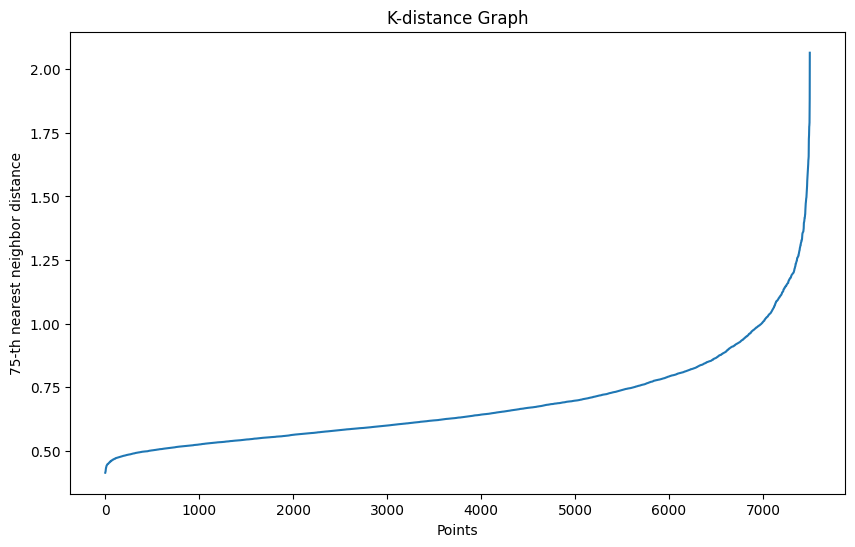

In [25]:
plot_k_distance_graph(train_small_array_transformed[:,indices_with_impact], k=75) # without 'Height' + 'Weight' as parameter

$\epsilon$ is set to 1.1 and *MinPts* to 9 (9 is chosen as square root of 75). Meaning an object with less than 9 neighbors in $\epsilon$-neighborhood is defined as noise.

In [26]:
epsilon = 1.1  # chosen based on k-distance graph
min_samples = 9  # sqrt of k_means distance for k-away point
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
clusters = dbscan.fit_predict(train_small_array_transformed[:,indices_with_impact]) # without 'Sex' as parameter

In [27]:
len(clusters[clusters == -1]) #noise has class -1

1

In [28]:
outlier_indices_small = np.where(clusters == -1)[0].tolist()
train_small.iloc[outlier_indices_small]

Sex  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  Calories
id                                                                          
1135  female   73   176.0    79.0       9.0       109.0       40.0     186.0

The one data points already visually spotted as outlier in the pairplots above (high `Calory` consumption not expected for the particular `Duration` of the workout ~10 min) is identified as outlier.

Pairplots coloring the outliers are shown below.

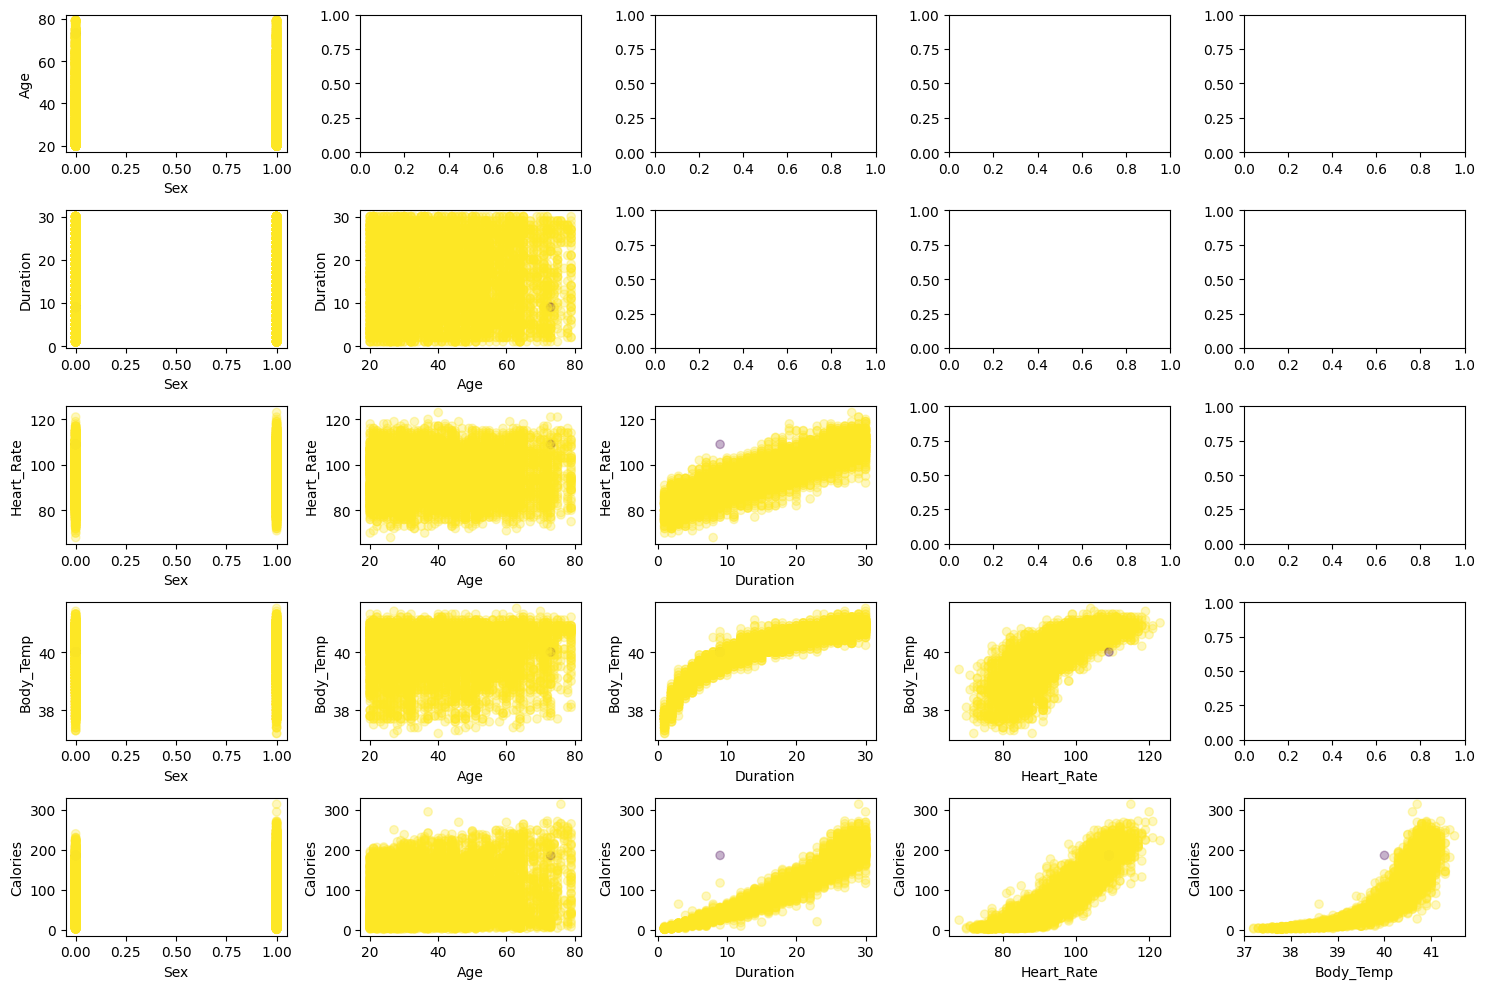

In [29]:
clusters_plot = clusters.copy()
clusters_plot[clusters_plot != -1] = 0 #all clusters except for noise are the same

nrows = 5
ncols = 5
fig, ax = plt.subplots(nrows, ncols, figsize=(15, 10))


for i_no, i in enumerate(indices_with_impact):
  for j_no, j in enumerate(indices_with_impact):

    parameter_x = train_small.columns[j]
    parameter_y = train_small.columns[i]

    if i_no > j_no:
      ax[i_no-1, j_no].scatter(train_small_array[:, j], train_small_array[:, i], c=clusters_plot, alpha = 0.3)

      ax[i_no-1, j_no].set_xlabel(f'{parameter_x}')
      ax[i_no-1, j_no].set_ylabel(f'{parameter_y}')


plt.tight_layout()
plt.show()

The observed outlier is an odd data point as `Heart Rate` and `Calories` burnt are quite high for the particular duration of the workout. It might be that the recording for the workout has started quite late, but also the subject suffers from a disease with "natural"  high `Heart Rate`and `Calory Consumption` like hyperthyroidism.

### <span style = "color: red" > Data Cleaning

Outliers are removed from the entire data set. Because upscaling of DBscan is difficult, the training dataset was split into 100 subsets (same size like small upset investigated above). On these small subsets outlier were determined in the same manner as above applying the DBScan algoritmn.

In [30]:
random.seed(333)
train_all_index = random.sample(index_all, train_all_size)

train_all_shuffled = train_all.iloc[train_all_index]

train_all_array = transform_df_to_array(train_all_shuffled.copy())
train_all_array_transformed = normalize_array(train_all_array)

In [31]:
display(k)
display(train_all_size)

clusters_all = np.zeros(train_all_size)

for j in range(k):
  start = int(train_all_size/k * j)
  end = int(train_all_size/k * (j+1))

  df_small = train_all_array_transformed[start:end]

  dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
  clusters_all[start:end] = dbscan.fit_predict(df_small[:,indices_with_impact])

100

750000

In [32]:
outlier_indices = np.where(clusters_all == -1)[0].tolist()
no_outlier_indices = np.where(clusters_all != -1)[0].tolist()
len(outlier_indices), len(no_outlier_indices)

(172, 749828)

Only 172 outliers of 750.000 data points were identified. This corresponds to 0.02% of the data only. Solely outliers are visualized below in a pairplot.

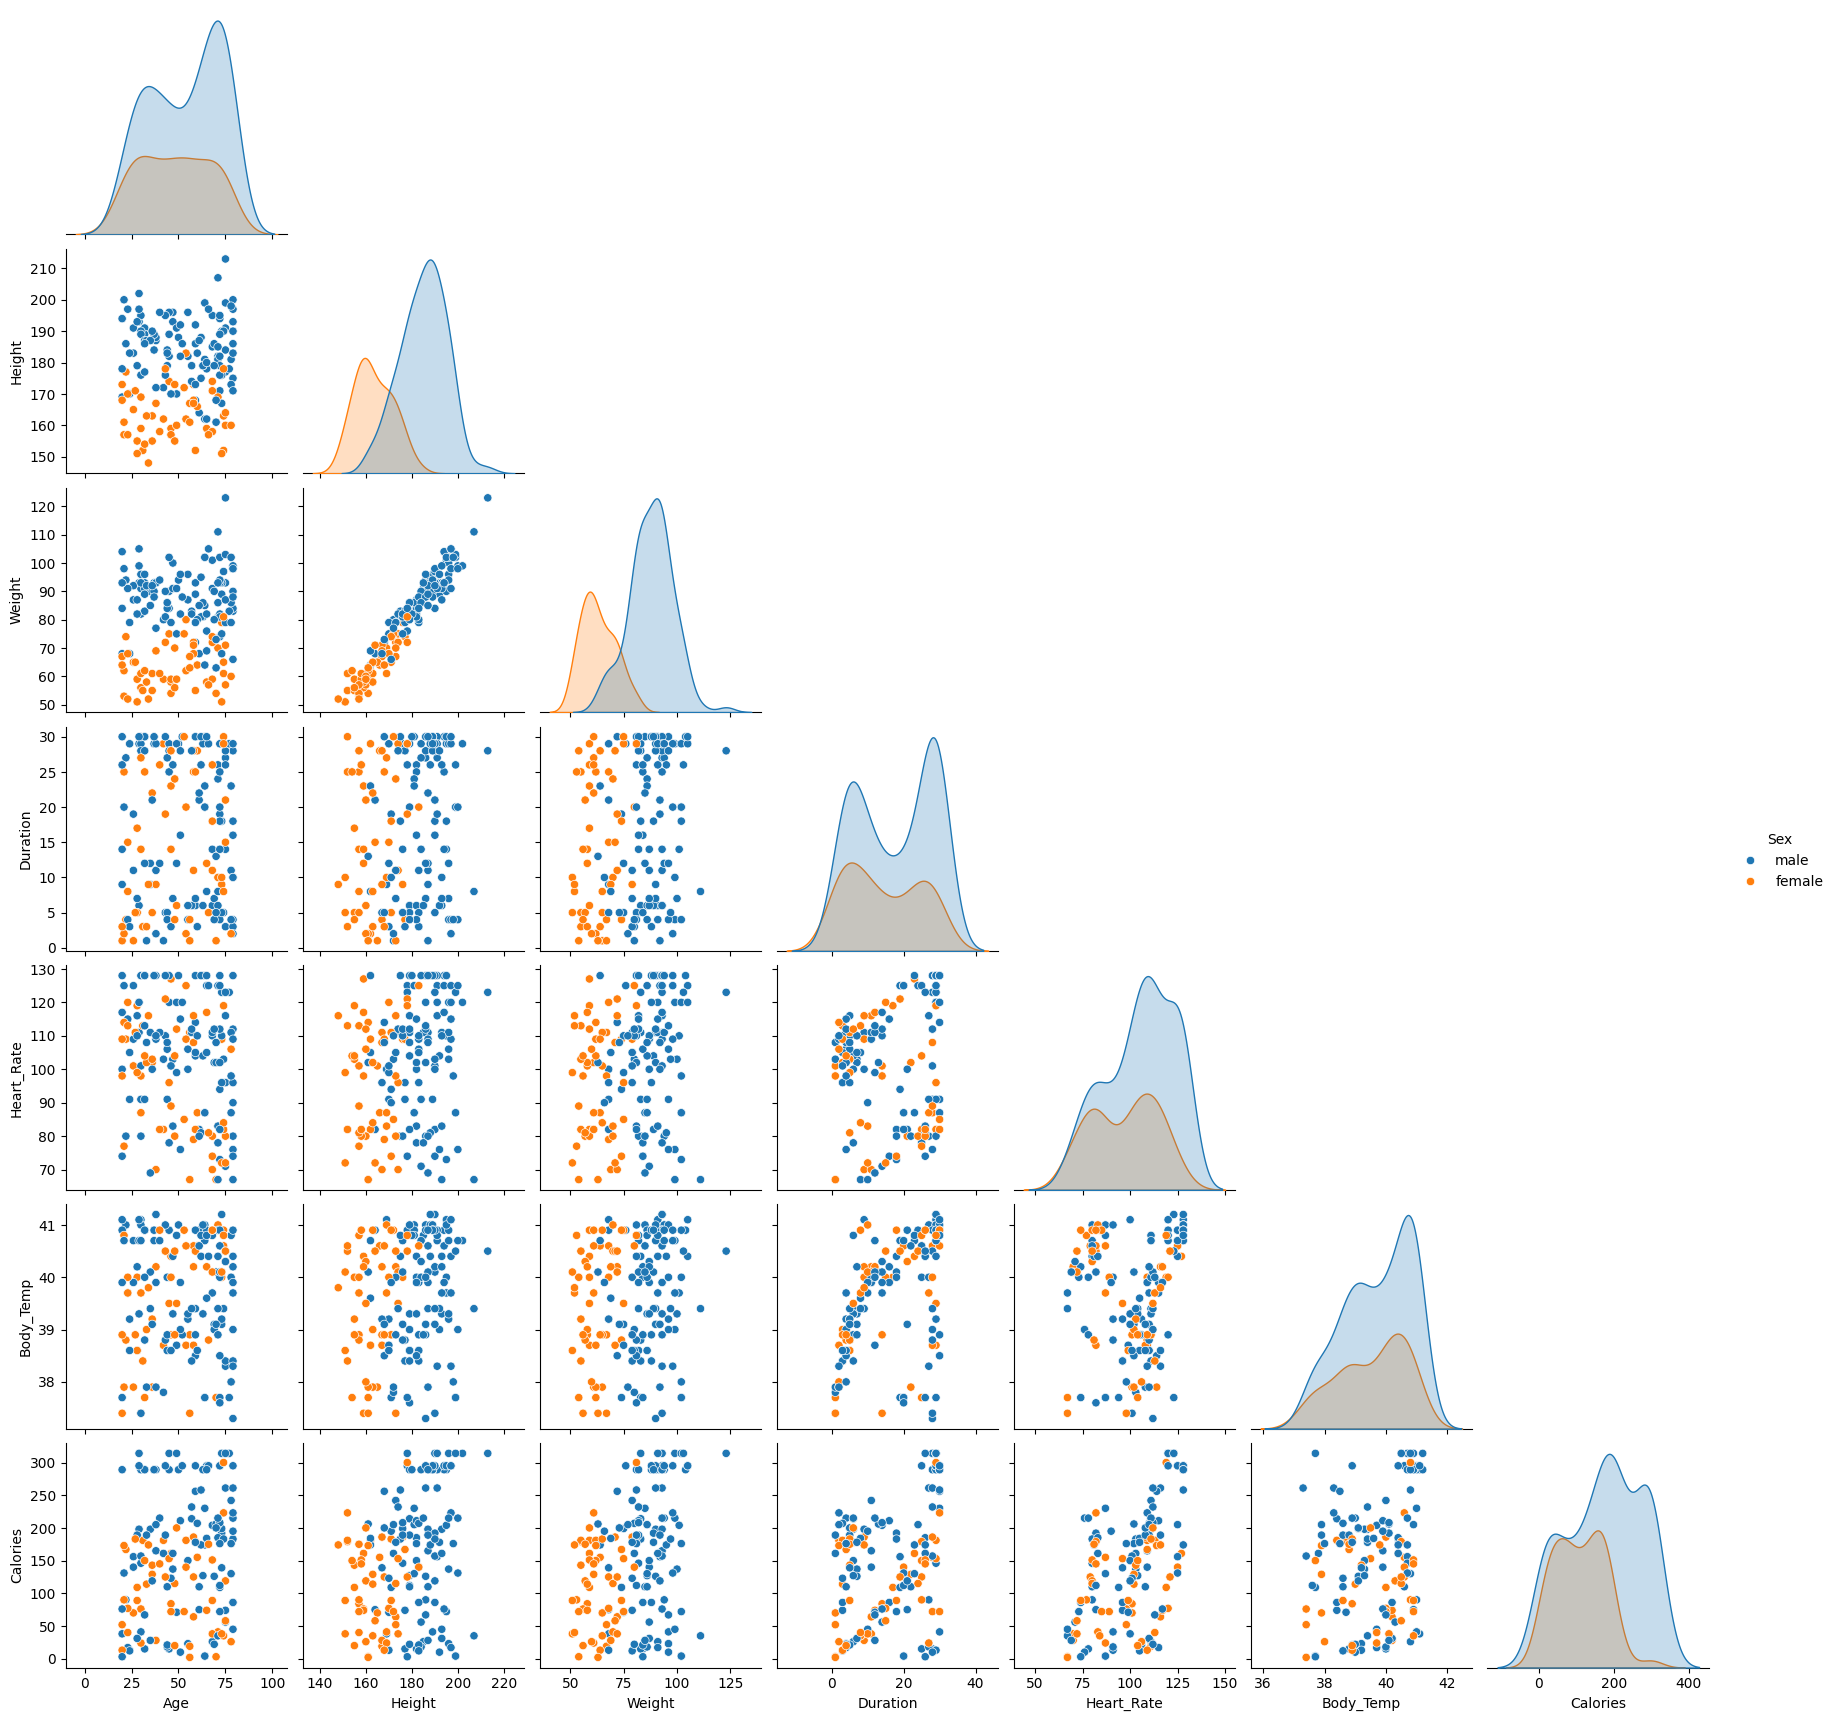

In [33]:
#Outlier only
sns.pairplot(train_all_shuffled.iloc[outlier_indices], hue = 'Sex', corner=True)

In [34]:
train_all_clean_array = transform_df_to_array(train_all_shuffled.iloc[no_outlier_indices]) #clean dataset as array

## <span style = "color: red" > Neural Network - Selection of Model Architecture and Hyperparameter Tuning

Finding the best modelling approach is really difficult. Question is, if better to start with model architecture optimization or with tuning of hyperparameter. The latter may significantly dependent on the model architecture. However, if hyperparameter are not defined optimally, it might be also difficult to compare different model architectures.

Therefore, both model architecture and hyperparameter are tuned in parallel.

### <span style = "color: red" > Data Preparation

For cross-validation "training" data (of Kaggle competition) are split further into a training and a validation data set using 80% of data as training data.

In [35]:
train_split_size = int(0.8 * train_all_clean_array.shape[0])

train_examples = train_all_clean_array[:train_split_size, :-1]
train_labels = train_all_clean_array[:train_split_size, -1]

val_examples = train_all_clean_array[train_split_size :, :-1]
val_labels = train_all_clean_array[train_split_size :, -1]

train_examples.shape, train_labels.shape, val_examples.shape, val_labels.shape

((599862, 7), (599862,), (149966, 7), (149966,))

In [36]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_examples, train_labels))
val_dataset = tf.data.Dataset.from_tensor_slices((val_examples, val_labels))

for feat, targ in train_dataset.take(5):
  display('Features: {}, Target: {}'.format(feat, targ))

for feat, targ in val_dataset.take(5):
  display('Features: {}, Target: {}'.format(feat, targ))

'Features: [  1.   40.  187.   91.   23.   98.   40.8], Target: 129.0'

'Features: [  0.   61.  165.   67.   29.  105.   41.2], Target: 190.0'

'Features: [  1.   31.  176.   76.   24.  107.   40.5], Target: 143.0'

'Features: [  0.   53.  162.   63.   10.   95.   39.6], Target: 53.0'

'Features: [  0.   55.  168.   66.   23.  108.   40.5], Target: 151.0'

'Features: [  0.   21.  162.   63.    5.   81.   39.1], Target: 17.0'

'Features: [  1.   46.  189.   95.    8.   80.   39.6], Target: 23.0'

'Features: [  1.   54.  194.   94.    8.   82.   39.4], Target: 30.0'

'Features: [  0.   40.  156.   60.    7.   91.   39.3], Target: 33.0'

'Features: [  0.   37.  153.   53.   12.   97.   39.9], Target: 65.0'

In [37]:
#define scale and offset for Rescaling layer (Min-Max-Normalization) for entire training data set
#https://en.wikipedia.org/wiki/Feature_scaling
max_all = train_all_clean_array[:,:-1].max(axis = 0)
min_all = train_all_clean_array[:,:-1].min(axis = 0)
a = -1
b = 1
scale = (b-a)/(max_all-min_all)
offset = a - min_all * scale
scale, offset

(array([2.        , 0.03389831, 0.02083333, 0.02083333, 0.06896552,
        0.03278689, 0.45454545]),
 array([ -1.        ,  -1.6779661 ,  -3.625     ,  -1.75      ,
         -1.06896552,  -3.19672131, -17.86363636]))

### <span style = "color: red" > Model Metric

The model metric to use per *Kaggle* competition is the **Root Mean Squared Logarithmic Error RMSLE** which is defined as:
$$RMSLE = \sqrt{\frac1 n\sum_{i=1}^n (\ln (1 + \hat y_i) - \ln (1 + y_i)^2}$$

$$= \sqrt{\frac1 n\sum_{i=1}^n 2\ln \frac {1 + \hat y_i} {1 + y_i}}$$

RMSLE considers the fraction between predicted and actual response value and hence is less sensitive towards overprediction, but also more sensitive towards underprediction.

https://medium.com/analytics-vidhya/root-mean-square-log-error-rmse-vs-rmlse-935c6cc1802a



### <span style = "color: red" > Functions for Architecture Selection and Hyperparameter Tuning

A function `model builder` is written to allow tuning of model architecture and hyperparameter.

The base structure is:
- **input layer**
- **normalization layer** to rescales the features to [-1,+1]-scale

  -> reason: weights in the following layer react more sensitive to features in this range
- **1 to 4 hidden blocks** each consisting of 2 dense layer with activation function "relu" or "leaky relu" followed by a batch normalization layer -> 2 to 8 combinations of dense and batch normalization layer

  -> reason: with batch normalization layer output is set to a range close to 0 - this reduces the vanishing or exploding gradient problem

- **output block** consisting of 1 dense layer with one node for the output variable with activation function "relu"

  -> 'relu' is used as activation function in the final layer as the model metric can only handle values above -1

As learning function **Stochastic Gradient Descent** is used with Nesterov momentum.

Nesterov momentum has a better convergence rate guarantee than gradient descent meaning global minimum of loss function more likely found in the learning process.

**Standard Stochastic Gradient Descent without Nesterov Momentum** is defined as:

$w_{next} = w - learning\ rate * f'(w)$

**Stochastic Gradient Descent with Momentum** is defined as:

$change_{next} = momentum * change - learning\ rate * f'(w)$

$w_{next} = w + change_{next}$

Traditional momentum involves maintaining an additional variable that represents the last update performed to the variable, an exponentially decaying moving average of past gradients.

**Stochastic Gradient Descent with Nesterov Momentum** is defined as:

$projection\_of\_w_{next} = w + momentum * change$

$change_{next} = momentum * change -  learning\ rate * f'(projection\_of\_w_{next})$

$w_{next} = w + change_{next}$

Calculating the gradient of the projected position acts like a correction factor for the acceleration that has been accumulated.

https://machinelearningmastery.com/gradient-descent-with-nesterov-momentum-from-scratch/


Function `model builder` allows selection / tuning of:
- *input_shape*:

  It has shon that parameter `Height`and `Weight`do not correlate with the target variable `Calories`. Hence, the both feature could be removed from the training data set in case of overfitting.

- *node_setting*

  Tupel length represents number of hidden layers, the index is the layer and the integer is the number of nodes for this particular layer.

- *activation*

  either "relu" or "leaky relu" which are typical standard activation function
- *learning_rate*
- *momentum_f*

  Factor to define the momentum relative to the learning rate.

In [38]:
from functools import partial

def normalization_block(inputs):
  x = tf.keras.layers.Rescaling(scale = scale, offset= offset)(inputs)
  return x

def hidden_block(x, node_A, node_B, activation):
  initializer = tf.keras.initializers.RandomNormal(mean=0., stddev=1.)
  x = tf.keras.layers.Dense(node_A, activation=activation, kernel_initializer = initializer)(x)
  x = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.layers.Dense(node_B, activation=activation, kernel_initializer = initializer)(x)
  x = tf.keras.layers.BatchNormalization()(x)
  return x

def output_block(x):
  initializer = tf.keras.initializers.RandomNormal(mean=0., stddev=1.)
  outputs = tf.keras.layers.Dense(1, activation = 'relu', kernel_initializer = initializer)(x)
  return outputs

def model_builder(input_shape, node_setting, activation, learning_rate, momentum_f):
  """
  model_builder defines and compiles neural network model with Nesterov momentum as learning function.

  :input_shape: number of features
  :node_setting: tupel representing hidden layers with number of nodes
  :activation: either "relu" or "leaky relu"
  :learning_rate
  :momentum_f: factor to define the momentum relative to the learning rate

  :return: model
  """
  no_hid_layer = len(node_setting)

  if activation == 'leaky_relu':
    activation = partial(tf.nn.leaky_relu, alpha=0.02)


  inputs = tf.keras.Input(shape=(input_shape,))
  x = normalization_block(inputs)

  if no_hid_layer in [2, 4, 6, 8]:
    x = hidden_block(x, node_setting[0], node_setting[1], activation)

    if no_hid_layer in [4, 6, 8]:
      x = hidden_block(x, node_setting[2], node_setting[3], activation)

      if no_hid_layer in [6, 8]:
        x = hidden_block(x, node_setting[4], node_setting[5], activation)

        if no_hid_layer in [8]:
          x = hidden_block(x, node_setting[6], node_setting[7], activation)

  outputs = output_block(x)

  model = tf.keras.Model(inputs=inputs, outputs=outputs)



  model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate, momentum = learning_rate * momentum_f, nesterov=True),
                loss=tf.keras.losses.MeanSquaredLogarithmicError,
                metrics = [tf.keras.metrics.MeanSquaredLogarithmicError, tf.keras.metrics.MeanAbsolutePercentageError()])

  return model

A function `optimize` is wriiten to compile and train as well as validate the model and save the model history for model metrics in csv format.

As additional model metric the mean absolute prediction error *MAPE* is chosen because this provides a very plastic picture of the model performance, much better than *RMSLE*.

Function `optimize` allows in addition to function `model_builder` (which is an input variable for `optimize`) tuning of:
- batch_size

In [39]:
def optimize(model_builder, batch_size, input_shape, node_settings, activation, learning_rates, momentum_fs, epochs, working_dir, output):
    """
    optimize is function to compile and train as well as validate the model and save the model history for model metrics in csv format.

    :model_builder: function to define neural network model
    :batch_size: batch size for training
    :input_shape: number of features
    :node_settings: list or tupel of tupels representing hidden layers with number of nodes
    :activation: either "relu" or "leaky relu"
    :learning_rates: list or tupel of learning rates
    :momentum_fs: list or tupel of factors to define the momentum relative to the learning rate
    :epochs: number of epochs
    :working_dir: working directory
    :output: name of output file

    :return: None
    """
    training_MSLE = {}
    validation_MSLE = {}

    training_MAPE = {}
    validation_MAPE = {}

    index = 1

    for node_setting in node_settings:
      for learning_rate in learning_rates:
        for momentum_f in momentum_fs:

          model = model_builder(input_shape, node_setting, activation, learning_rate, momentum_f)
          print(model.summary())

          train_final = train_dataset.shuffle(train_dataset.cardinality()).batch(batch_size)
          val_final = val_dataset.batch(batch_size)

          history = model.fit(train_final, validation_data=val_final, epochs=epochs, verbose = 0)

          training_MSLE[(batch_size, input_shape, node_setting, activation, learning_rate, momentum_f, index)] = history.history['mean_squared_logarithmic_error']
          validation_MSLE[(batch_size, input_shape, node_setting, activation, learning_rate, momentum_f, index)] = history.history['val_mean_squared_logarithmic_error']

          training_MAPE[(batch_size, input_shape, node_setting, activation, learning_rate, momentum_f, index)] = history.history['mean_absolute_percentage_error']
          validation_MAPE[(batch_size, input_shape, node_setting, activation, learning_rate, momentum_f, index)] = history.history['val_mean_absolute_percentage_error']

          pd.DataFrame(training_MSLE).to_csv(os.path.join(working_dir, f'{output}_train_MSLE.csv'))
          pd.DataFrame(validation_MSLE).to_csv(os.path.join(working_dir, f'{output}_val_MSLE.csv'))
          pd.DataFrame(training_MAPE).to_csv(os.path.join(working_dir, f'{output}_train_MAPE.csv'))
          pd.DataFrame(validation_MAPE).to_csv(os.path.join(working_dir, f'{output}_val_MAPE.csv'))

          index += 1

Function `plot_RMSLE_MAPE` gives training and validation history for metrics *RMSLE* or *MAPE* for hyperparameter investigated with function `optimize`.
Dependent on files loaded *RMSLE* or *MAPE* is plotted.

In [40]:
def plot_RMSLE_MAPE(batch_size, input_shape, node_settings, activation, learning_rates, momentum_fs, epochs, working_dir, file_train, file_valid, target, ymax):
    """
    plot_RMSLE_MAPE gives plots of training and validation history for metrics RMSLE or MAPE for hyperparameter investigated with function optimize.

    :batch_size: batch size for training
    :input_shape: number of features
    :node_settings: list or tupel of tupels representing hidden layers with number of nodes
    :activation: either "relu" or "leaky relu"
    :learning_rates: list or tupel of learning rates
    :momentum_fs: list or tupel of factors to define the momentum relative to the learning rate
    :epochs: number of epochs
    :working_dir: working directory
    :file_train: name of file with training history
    :file_valid: name of file with validation history
    :target: target value of y axis
    :ymax: maximum value of y axis

    :return: None
    """
    if file_train.endswith('MSLE.csv'):
      metric = 'MSLE'
      df_train = pd.read_csv(os.path.join(working_dir, file_train), header=[i for i in range(7)], index_col=0)
      df_val = pd.read_csv(os.path.join(working_dir, file_valid), header=[i for i in range(7)], index_col=0)

    if file_train.endswith('MAPE.csv'):
      metric = 'MAPE'
      df_train = pd.read_csv(os.path.join(working_dir, file_train), header=[i for i in range(7)], index_col=0)
      df_val = pd.read_csv(os.path.join(working_dir, file_valid), header=[i for i in range(7)], index_col=0)


    ncols = 3
    nrows = 6

    fig = plt.gcf()
    fig.set_size_inches(ncols * 4.5, nrows * 3)
    index = 1

    ymin = -0.01

    if ymax == 'std':
      if metric == 'MSLE':
        ymax = max(np.max(df_train), np.max(df_val))**0.5 * 1.03 #transformed to give ymax for RMSLE
      else:
        ymax = max(np.max(df_train), np.max(df_val)) * 1.03

    #work around that numbers are stored as strings in csv with different rounding rules, momentum integer can have either 0 or 1 decimal only
    momentum_integer = []
    for momentum_f in momentum_fs:
        momentum_integer.append(True if momentum_f == int(momentum_f) else False)

    if all(momentum_integer) == True:
      momentum_fs_new = [f'{momentum_f:.0f}' for momentum_f in momentum_fs]
    else:
      momentum_fs_new = [f'{momentum_f:.1f}' for momentum_f in momentum_fs]


    for node_setting in node_settings:
      for learning_rate in learning_rates:
        for momentum_f in momentum_fs_new:

          train= df_train[(str(batch_size), str(input_shape), str(node_setting), activation, str(learning_rate), momentum_f, str(index))]
          val = df_val[(str(batch_size), str(input_shape), str(node_setting), activation, str(learning_rate), momentum_f, str(index))]

          if metric == 'MSLE':
            train = np.sqrt(train) #transformed to give RMSLE
            val = np.sqrt(val) #transformed to give RMSLE

          epoch_seq = np.arange(1, epochs + 1)

          sp = plt.subplot(nrows, ncols, index)
          sp.plot(epoch_seq, train, label='Training')
          sp.plot(epoch_seq, val, label='Validation')
          sp.plot(epoch_seq, [target]*epochs, color = 'black')
          sp.set_title(f'{metric}, #{batch_size}, input = {input_shape},\nnodes = {node_setting}, {activation}, lr={learning_rate}, mf = {momentum_f}', fontsize=9)
          sp.set_xlabel('epoch')

          if metric == 'MSLE':
            sp.set_ylabel('RMSLE')
          else:
            sp.set_ylabel('MAPE')

          sp.set_ylim(ymin, ymax)
          sp.legend(['train', 'val'])
          sp.grid()
          index += 1
    plt.tight_layout()
    plt.show()

In [41]:
#working_dir = '/kaggle/working'
working_dir = '/content/drive//MyDrive/Calories'

if not os.path.exists(working_dir):
  os.makedirs(working_dir)

**For all optimization trials**: Two runs are conducted to test the stability of the model.

**First trial**

In the first trial model architecture is fixed to a network with 4 hidden layers.
Learning rate and momentum of the learning rate function is optimized by testing different settings.

In [ ]:
model_builder = model_builder
batch_size = 1000
input_shape = 7
node_settings = [(10,10,10,10), (10,10,10,10)]
activation = 'leaky_relu'
learning_rates = [0.01, 0.05]
momentum_fs = [0.1, 0.5, 2]
epochs = 150
output = 'model_1'

optimize(model_builder, batch_size, input_shape, node_settings, activation, learning_rates, momentum_fs, epochs, working_dir, output)

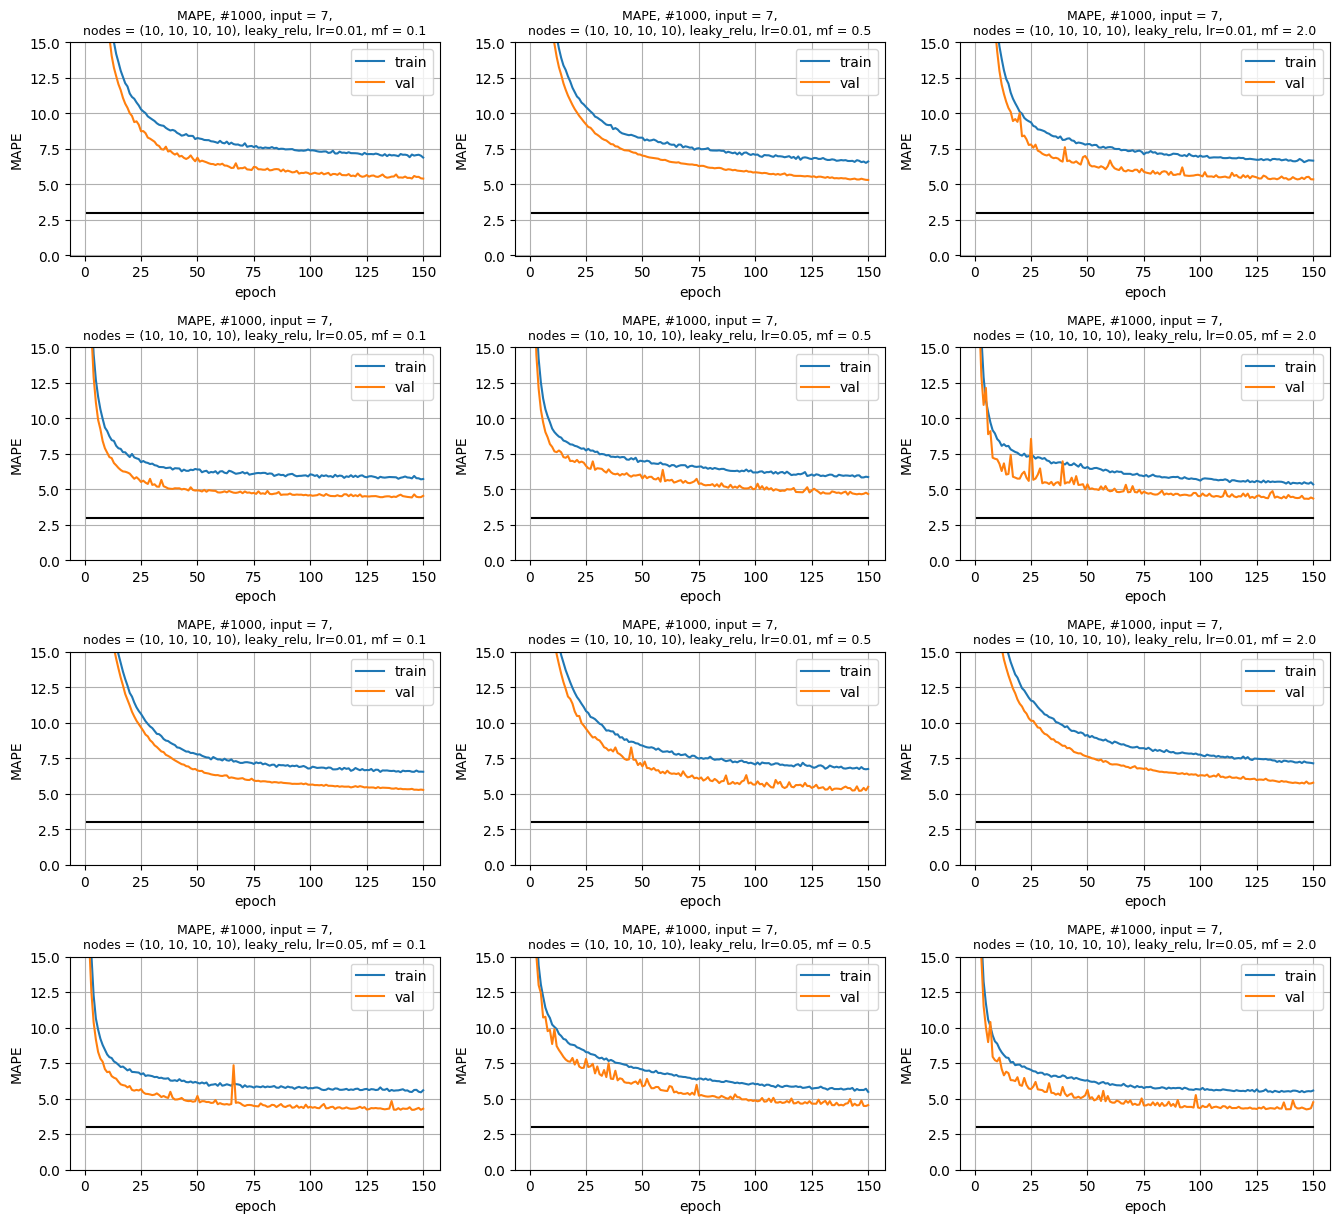

In [42]:
batch_size = 1000
input_shape = 7
node_settings = [(10,10,10,10), (10,10,10,10)]
activation = 'leaky_relu'
learning_rates = [0.01, 0.05]
momentum_fs = [0.1, 0.5, 2]
epochs = 150

plot_RMSLE_MAPE(batch_size, input_shape, node_settings, activation, learning_rates, momentum_fs, epochs, working_dir, 'model_1_train_MAPE.csv', 'model_1_val_MAPE.csv',
           target = 3, ymax = 15)

*Observations*

Independent of the learning rate, a momentum of 0.1 gives the lower and/or more stable validation error.

With a higher learning rate of 0.1, validation error is lower.
Momentum is fixed to 0.1.

**A deeper architecture and higher learning rate**

A deeper architecture is tested. In parallel, a higher learning rate is also investigated with regard to model performance.

In [ ]:
model_builder = model_builder
batch_size = 1000
input_shape = 7
node_settings = [(10,10,10,10), (10,10,10,10), (10,10,10,10,10,10), (10,10,10,10,10,10)]
activation = 'leaky_relu'
learning_rates = [0.1, 0.2]
momentum_fs = [0.1]
epochs = 150
output = 'model_2'

optimize(model_builder, batch_size, input_shape, node_settings, activation, learning_rates, momentum_fs, epochs, working_dir, output)

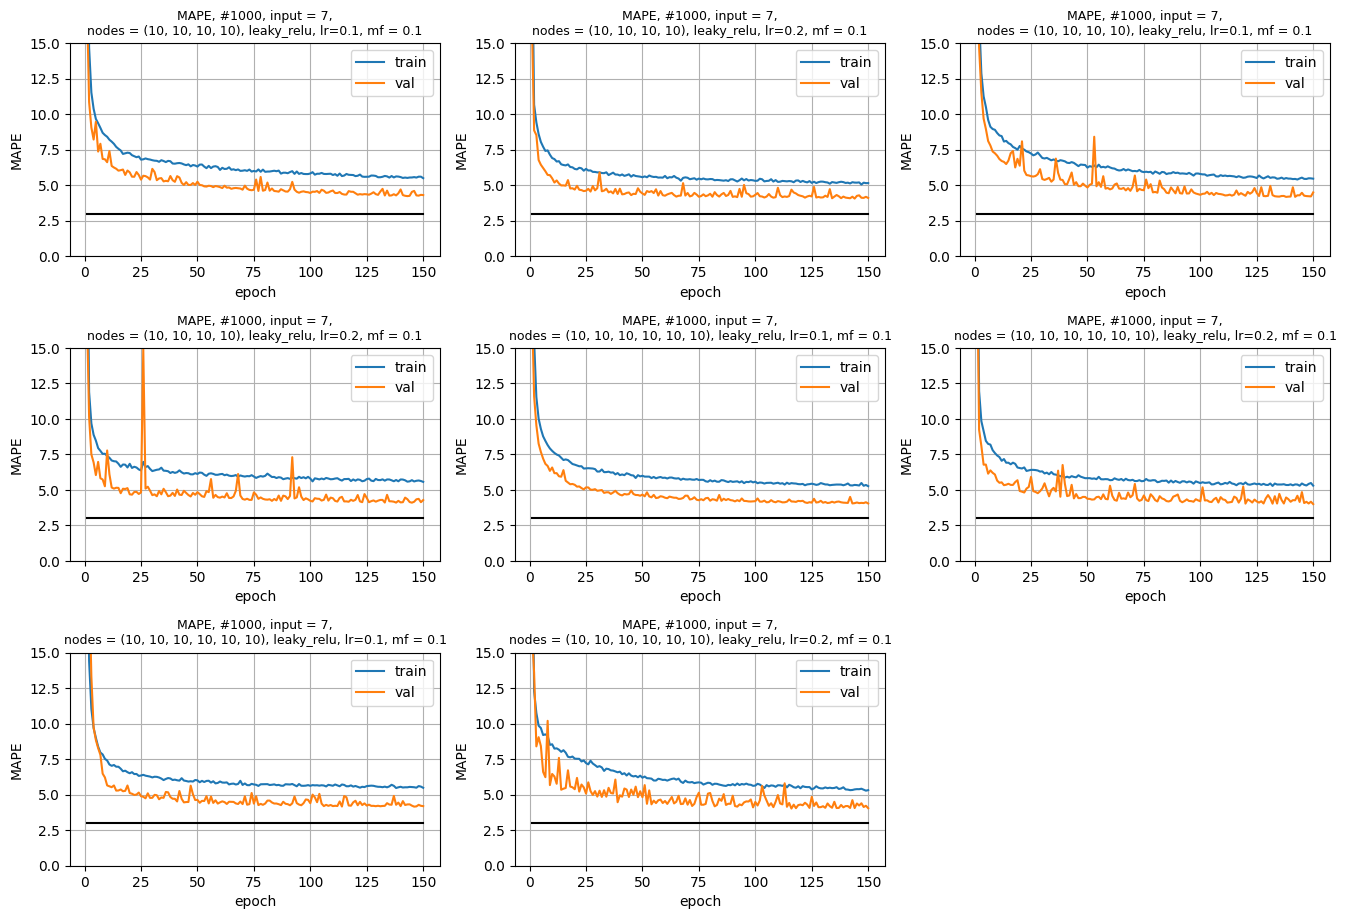

In [43]:
batch_size = 1000
input_shape = 7
node_settings = [(10,10,10,10), (10,10,10,10), (10,10,10,10,10,10), (10,10,10,10,10,10)]
activation = 'leaky_relu'
learning_rates = [0.1, 0.2]
momentum_fs = [0.1]
epochs = 150

plot_RMSLE_MAPE(batch_size, input_shape, node_settings, activation, learning_rates, momentum_fs, epochs, working_dir, 'model_2_train_MAPE.csv', 'model_2_val_MAPE.csv',
           target = 3, ymax = 15)

*Observations*

The learning rate of 0.2 is too high leading to a unstable validation error.

The deeper architecture does not give a better model fit.

**Even more deeper architecture**

The suitability of an even more deeper architecture is analyzed, but the learning rate is slighly decreased as the idea is that this might be too high for this architecture.

In [ ]:
model_builder = model_builder
batch_size = 1000
input_shape = 7
node_settings = [(10,10,10,10,10,10), (10,10,10,10,10,10), (10,10,10,10,10,10,10,10), (10,10,10,10,10,10,10,10)]
activation = 'leaky_relu'
learning_rates = [0.05]
momentum_fs = [0.1]
epochs = 150
output = 'model_3'

optimize(model_builder, batch_size, input_shape, node_settings, activation, learning_rates, momentum_fs, epochs, working_dir, output)

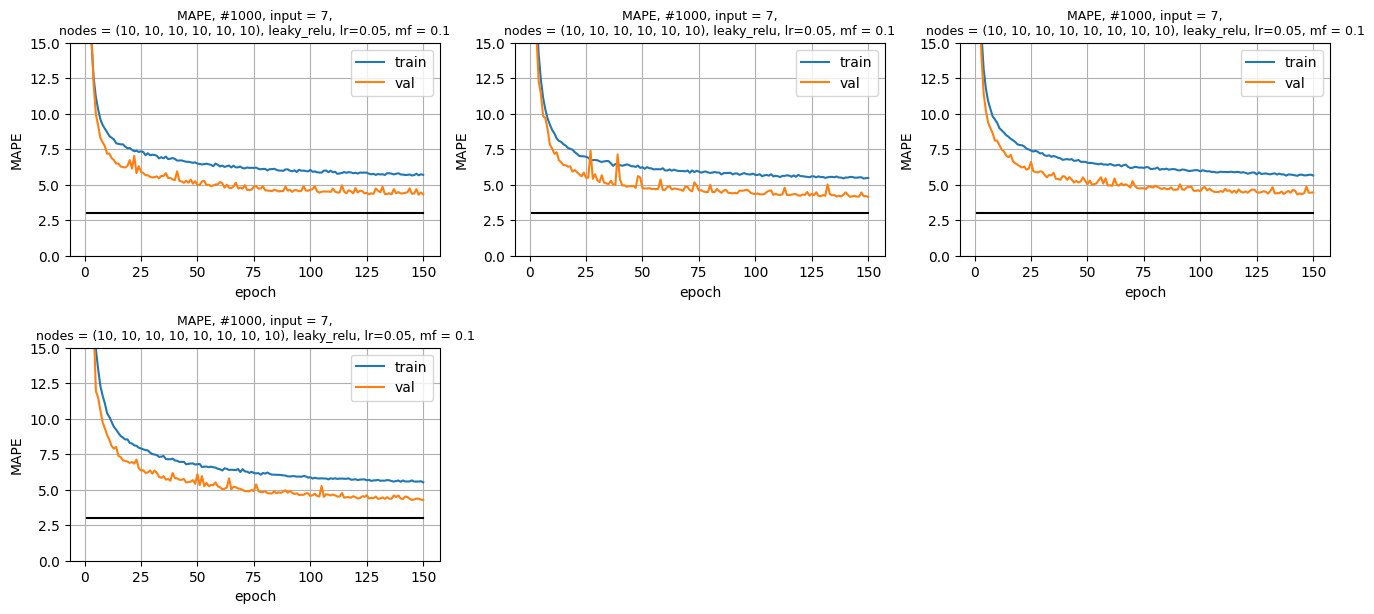

In [44]:
batch_size = 1000
input_shape = 7
node_settings = [(10,10,10,10,10,10), (10,10,10,10,10,10), (10,10,10,10,10,10,10,10), (10,10,10,10,10,10,10,10)]
activation = 'leaky_relu'
learning_rates = [0.05]
momentum_fs = [0.1]
epochs = 150

plot_RMSLE_MAPE(batch_size, input_shape, node_settings, activation, learning_rates, momentum_fs, epochs, working_dir, 'model_3_train_MAPE.csv', 'model_3_val_MAPE.csv',
           target = 3, ymax = 15)

*Observations*

Model validation error remains unimpacted by changing the architecture to a deeper one. It seems that the validation error is already close to the irreducible error and the model already performs at the optimum.

**A flatter, but much broader architecture**

A flatter, much broader architecture with a higher number of trainable parameter of ~7,800 is investigated.

In [ ]:
model_builder = model_builder
batch_size = 1000
input_shape = 7
node_settings = [(100,50,25,10), (100,50,25,10)]
activation = 'leaky_relu'
learning_rates = [0.05, 0.1]
momentum_fs = [0.1]
epochs = 150
output = 'model_4'

optimize(model_builder, batch_size, input_shape, node_settings, activation, learning_rates, momentum_fs, epochs, working_dir, output)

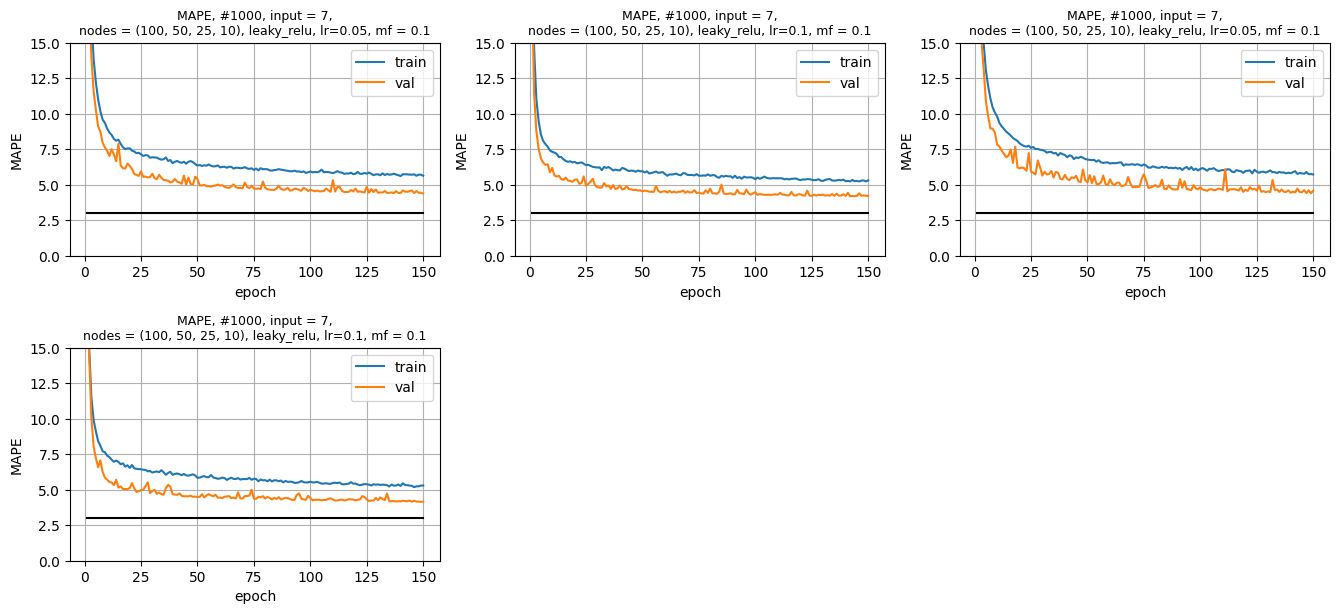

In [45]:
batch_size = 1000
input_shape = 7
node_settings = [(100,50,25,10), (100,50,25,10)]
activation = 'leaky_relu'
learning_rates = [0.05, 0.1]
momentum_fs = [0.1]
epochs = 150

plot_RMSLE_MAPE(batch_size, input_shape, node_settings, activation, learning_rates, momentum_fs, epochs, working_dir, 'model_4_train_MAPE.csv', 'model_4_val_MAPE.csv',
           target = 3, ymax = 15)

*Observations*

Validation error is slighly improved for the broader model, specifically when setting learning rate to 0.1.

**A broader and deeper architecture and higher learning rates**

Again, it is investigated if a deeper model architecture which is likewise broad improves the model fit. The learning rate is increased simulatanously.

In [ ]:
model_builder = model_builder
batch_size = 1000
input_shape = 7
node_settings = [(100,50,25,10), (100,50,25,10), (100,100,50,50,25,25),(100,100,50,50,25,25)]
activation = 'leaky_relu'
learning_rates = [0.25, 0.5]
momentum_fs = [0.1]
epochs = 150
output = 'model_5'

optimize(model_builder, batch_size, input_shape, node_settings, activation, learning_rates, momentum_fs, epochs, working_dir, output)

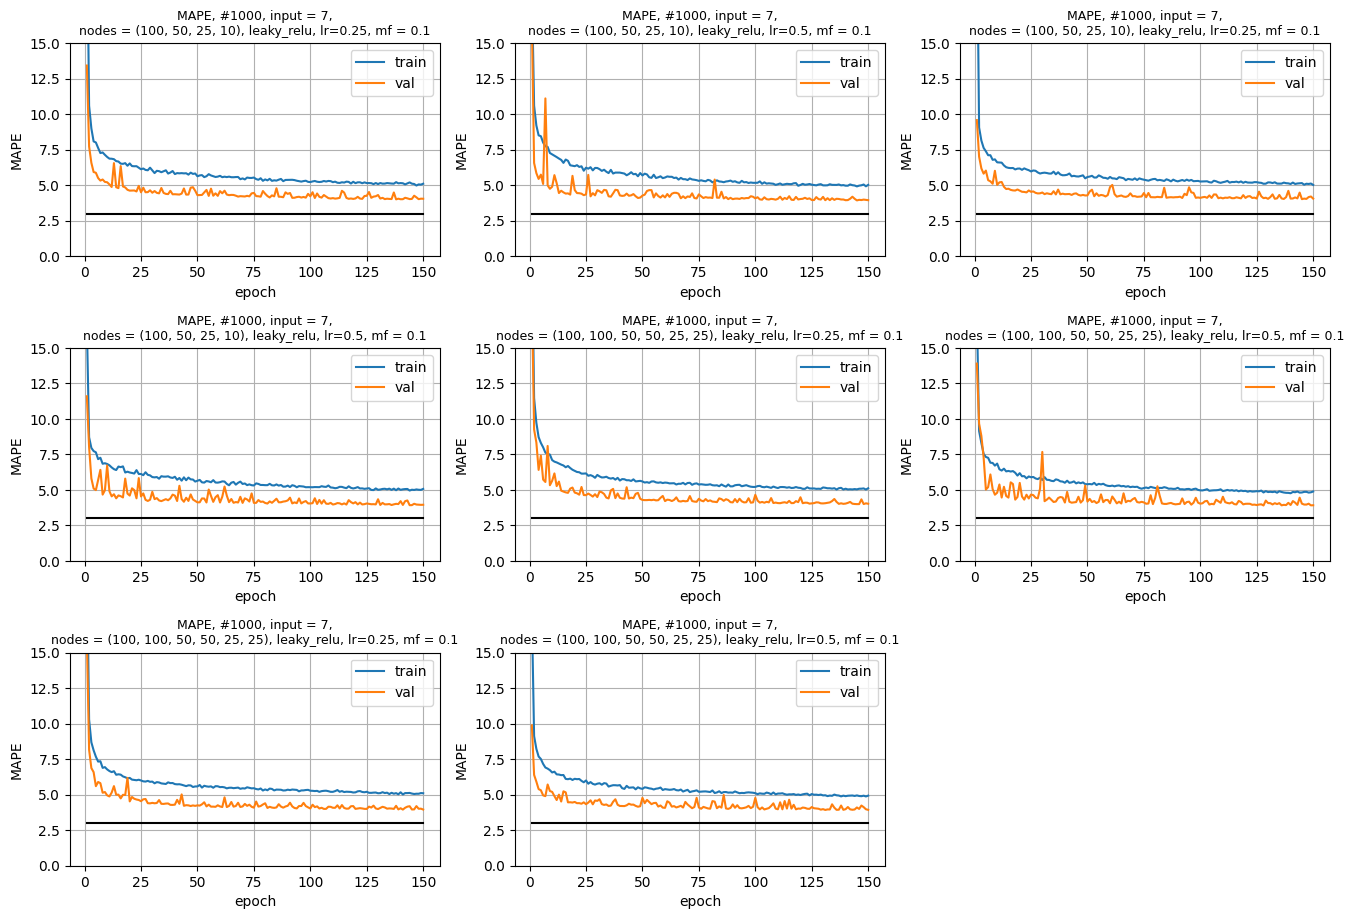

In [46]:
batch_size = 1000
input_shape = 7
node_settings = [(100,50,25,10), (100,50,25,10), (100,100,50,50,25,25),(100,100,50,50,25,25)]
activation = 'leaky_relu'
learning_rates = [0.25, 0.5]
momentum_fs = [0.1]
epochs = 150

plot_RMSLE_MAPE(batch_size, input_shape, node_settings, activation, learning_rates, momentum_fs, epochs, working_dir, 'model_5_train_MAPE.csv', 'model_5_val_MAPE.csv',
           target = 3, ymax = 15)

*Observations*

The deeper model gives a validation error comparable to the flatter one. The higher learning rate results into a very slighly better model fit, but is slighly more unstable. Concluding, the validation error is very comparable between the models.
Learning rate is fixed to 0.1.

**Activation function "relu" instead of "leaky relu"**

All model optimization runs so far were conducted with "relu" as activation function. "Relu" is a standard activation function, setting the model output per node to 0 if the activation input is $\leq 0$. "Leaky relu" is actually an improvement of "relu" giving a small value as output for an input $\leq 0$. This enables also learning for activation inputs $\leq 0$.

In [ ]:
model_builder = model_builder
batch_size = 1000
input_shape = 7
node_settings = [(100,50,25,10), (100,50,25,10)]
activation = 'relu'
learning_rates = [0.1]
momentum_fs = [0.1]
epochs = 150
output = 'model_6'

optimize(model_builder, batch_size, input_shape, node_settings, activation, learning_rates, momentum_fs, epochs, working_dir, output)

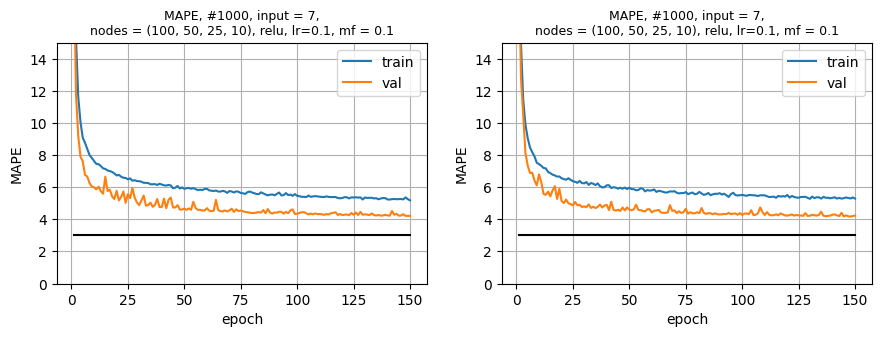

In [47]:
batch_size = 1000
input_shape = 7
node_settings = [(100,50,25,10), (100,50,25,10)]
activation = 'relu'
learning_rates = [0.1]
momentum_fs = [0.1]
epochs = 150

plot_RMSLE_MAPE(batch_size, input_shape, node_settings, activation, learning_rates, momentum_fs, epochs, working_dir, 'model_6_train_MAPE.csv', 'model_6_val_MAPE.csv',
           target = 3, ymax = 15)

*Observations*

Differences in validation error between models using "leaky relu" or "relu" as activation function are very minute. "Leaky relu" gives a slighly lower validation error.
Modelling is continued with "leaky relu".

**A higher batch size**

The effect of a higher batch size is tested. The output for a single batch is more "averaged" with a higher batch size.

In [ ]:
model_builder = model_builder
batch_size = 5000
input_shape = 7
node_settings = [(100,50,25,10), (100,50,25,10)]
activation = 'leaky_relu'
learning_rates = [0.1, 0.5]
momentum_fs = [0.1]
epochs = 150
output = 'model_7'

optimize(model_builder, batch_size, input_shape, node_settings, activation, learning_rates, momentum_fs, epochs, working_dir, output)

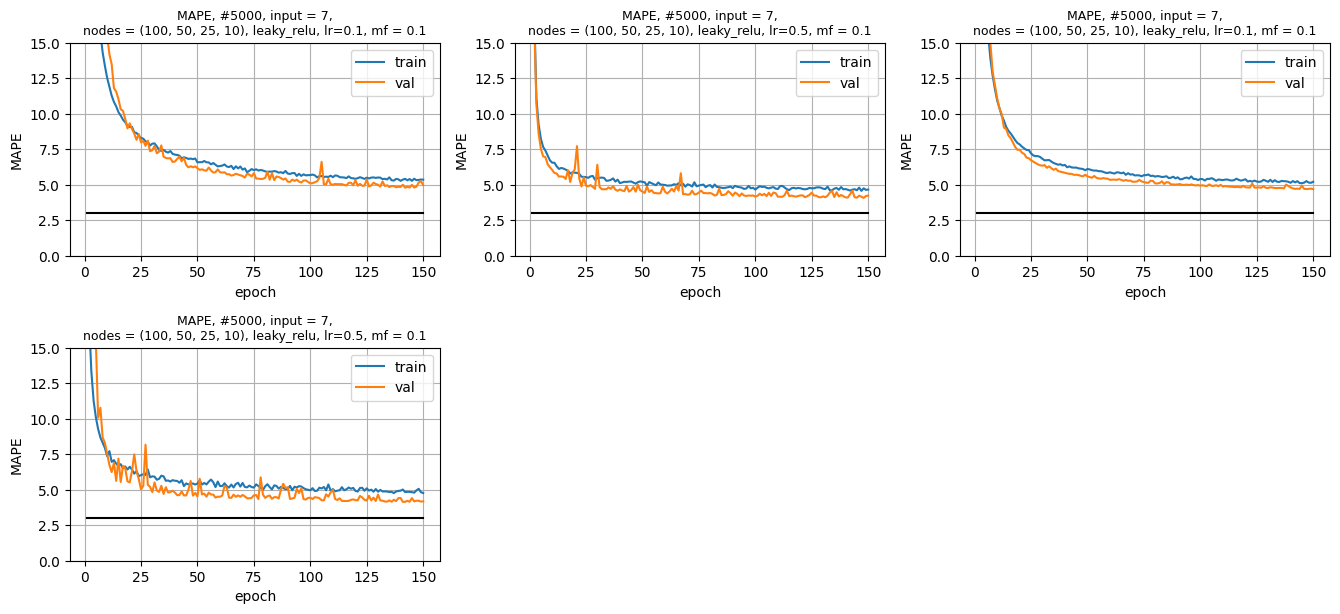

In [48]:
batch_size = 5000
input_shape = 7
node_settings = [(100,50,25,10), (100,50,25,10)]
activation = 'leaky_relu'
learning_rates = [0.1, 0.5]
momentum_fs = [0.1]
epochs = 150

plot_RMSLE_MAPE(batch_size, input_shape, node_settings, activation, learning_rates, momentum_fs, epochs, working_dir, 'model_7_train_MAPE.csv', 'model_7_val_MAPE.csv',
           target = 3, ymax = 15)

*Observations*

Again model validation error is very comparable between models using batch sizes of 1000 and 5000. Batch size is kept at 1000.


**Another learning function Adam**

Adam as learning function is investigated.
Adam uses all the gradients computed before. Even if it gets stuck in a subspace with small gradients, the momentum of the previous steps is expected to push it in the right direction.


https://www.baeldung.com/cs/adam-optimizer

In [ ]:
def model_builder_adam(input_shape, node_setting, activation, learning_rate, momentum_f):
  """
  model_builder_adam is function to define neural network model with Adam as learning function.

  :input_shape: number of features
  :node_setting: tupel representing hidden layers with number of nodes
  :activation: either "relu" or "leaky relu"
  :learning_rate
  :momentum_f: factor to define the momentum relative to the learning rate

  :return: model
  """

  no_hid_layer = len(node_setting)

  if activation == 'leaky_relu':
    activation = partial(tf.nn.leaky_relu, alpha=0.02)


  inputs = tf.keras.Input(shape=(input_shape,))
  x = normalization_block(inputs)

  if no_hid_layer in [2, 4, 6, 8]:
    x = hidden_block(x, node_setting[0], node_setting[1], activation)

    if no_hid_layer in [4, 6, 8]:
      x = hidden_block(x, node_setting[2], node_setting[3], activation)

      if no_hid_layer in [6, 8]:
        x = hidden_block(x, node_setting[4], node_setting[5], activation)

        if no_hid_layer in [8]:
          x = hidden_block(x, node_setting[6], node_setting[7], activation)

  outputs = output_block(x)

  model = tf.keras.Model(inputs=inputs, outputs=outputs)



  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),
                loss=tf.keras.losses.MeanSquaredLogarithmicError,
                metrics = [tf.keras.metrics.MeanSquaredLogarithmicError, tf.keras.metrics.MeanAbsolutePercentageError()])

  return model

In [ ]:
model_builder = model_builder_adam
batch_size = 1000
input_shape = 7
node_settings = [(100,50,25,10), (100,50,25,10)]
activation = 'leaky_relu'
learning_rates = [0.0002, 0.001, 0.005]
momentum_fs = [0]
epochs = 150
output = 'model_8a'

optimize(model_builder, batch_size, input_shape, node_settings, activation, learning_rates, momentum_fs, epochs, working_dir, output)

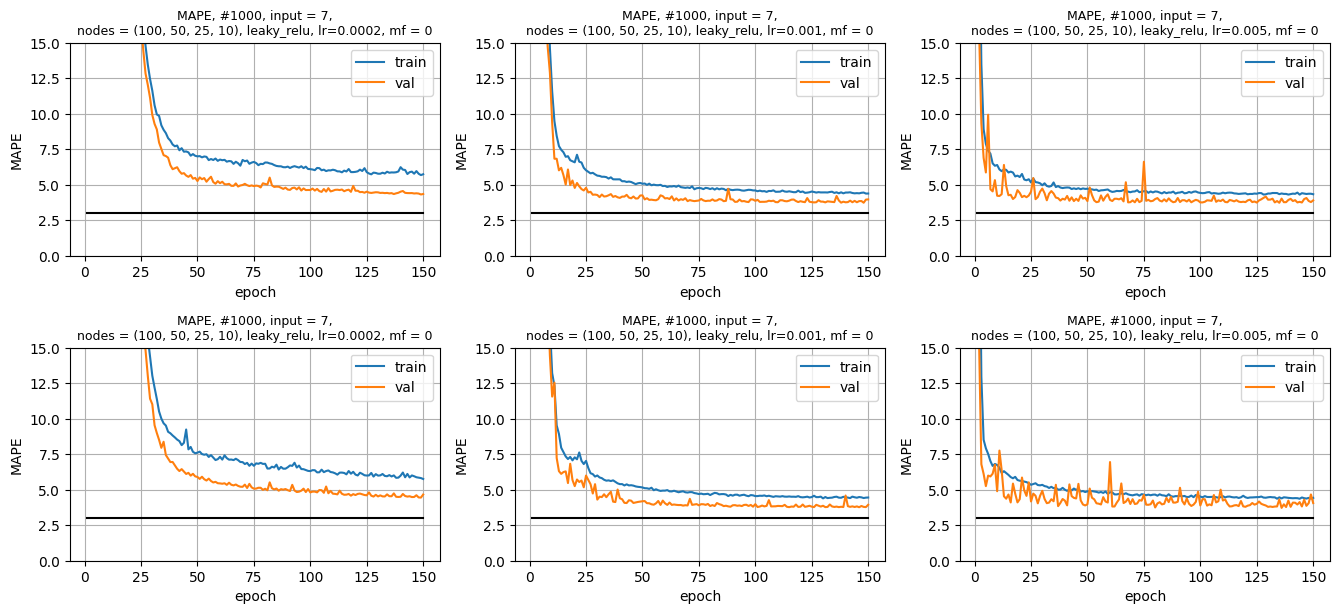

In [49]:
batch_size = 1000
input_shape = 7
node_settings = [(100,50,25,10), (100,50,25,10)]
activation = 'leaky_relu'
learning_rates = [0.0002, 0.001, 0.005]
momentum_fs = [0]
epochs = 150
output = 'model_8a'

plot_RMSLE_MAPE(batch_size, input_shape, node_settings, activation, learning_rates, momentum_fs, epochs, working_dir, 'model_8a_train_MAPE.csv', 'model_8a_val_MAPE.csv',
           target = 3, ymax = 15)

Adam learning function provides a slighly better model fit when learning rate is set to 0.001. With a higher learning rates, validation error fluctuates strongly.

**Very broad architecture with Adam**

Due to the high number of observations in the training dataset (~600.000 after splitting into training and validation data), it is further tested if a very flexible network with a huge number trainable parameter further improves the model fit. As training takes very long, it is run only once.

In [ ]:
model_builder = model_builder_adam
batch_size = 1000
input_shape = 7
node_settings = [(500,250,100,50)]
activation = 'leaky_relu'
learning_rates = [0.001]
momentum_fs = [0]
epochs = 150
output = 'model_8b'

optimize(model_builder, batch_size, input_shape, node_settings, activation, learning_rates, momentum_fs, epochs, working_dir, output)

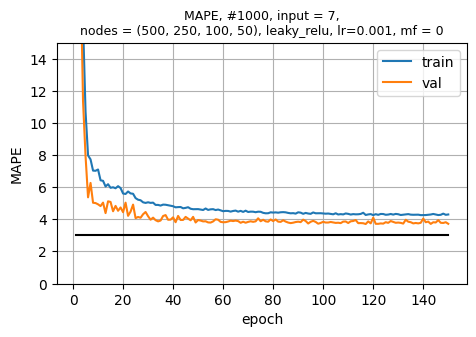

In [50]:
batch_size = 1000
input_shape = 7
node_settings = [(500,250,100,50)]
activation = 'leaky_relu'
learning_rates = [0.001]
momentum_fs = [0]
epochs = 150
output = 'model_8b'

plot_RMSLE_MAPE(batch_size, input_shape, node_settings, activation, learning_rates, momentum_fs, epochs, working_dir, 'model_8b_train_MAPE.csv', 'model_8b_val_MAPE.csv',
           target = 3, ymax = 15)

The model performance is very slightly improved. However, due to the high training time, number of nodes of hidden layers is not increased and set to (100, 50, 25, 10).

**Model without batch normalization**

A fixed model architecture using a batch normalization layer after each layer was used for model optimization.
It would be intresting to see practically the effect of the batch normalization layer. Actually, with batch normalization, outputs per layer are brought to a range close to 0 enabling better learning as the activation function are most sensitive in this range. Additionally, the problem of vanishing and exploding gradients is avoided.

In [ ]:
def hidden_block_wo_bn(x, node_A, node_B, activation):
  initializer = tf.keras.initializers.RandomNormal(mean=0., stddev=1.)
  x = tf.keras.layers.Dense(node_A, activation=activation, kernel_initializer = initializer)(x)
  x = tf.keras.layers.Dense(node_B, activation=activation, kernel_initializer = initializer)(x)
  return x

def model_builder_wo_bn(input_shape, node_setting, activation, learning_rate, momentum_f):
  """
  model_builder_wo_bn is function to define neural network model without batch normalization with Nesterov momentum as learning function.

  :input_shape: number of features
  :node_setting: tupel representing hidden layers with number of nodes
  :activation: either "relu" or "leaky relu"
  :learning_rate
  :momentum_f: factor to define the momentum relative to the learning rate

  :return: model
  """

  no_hid_layer = len(node_setting)

  if activation == 'leaky_relu':
    activation = partial(tf.nn.leaky_relu, alpha=0.02)


  inputs = tf.keras.Input(shape=(input_shape,))
  x = normalization_block(inputs)

  if no_hid_layer in [2, 4, 6, 8]:
    x = hidden_block_wo_bn(x, node_setting[0], node_setting[1], activation)

    if no_hid_layer in [4, 6, 8]:
      x = hidden_block_wo_bn(x, node_setting[2], node_setting[3], activation)

      if no_hid_layer in [6, 8]:
        x = hidden_block_wo_bn(x, node_setting[4], node_setting[5], activation)

        if no_hid_layer in [8]:
          x = hidden_block_wo_bn(x, node_setting[6], node_setting[7], activation)

  outputs = output_block(x)

  model = tf.keras.Model(inputs=inputs, outputs=outputs)


  model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate, momentum = learning_rate * momentum_f, nesterov=True),
                loss=tf.keras.losses.MeanSquaredLogarithmicError,
                metrics = [tf.keras.metrics.MeanSquaredLogarithmicError, tf.keras.metrics.MeanAbsolutePercentageError()])

  return model

In [ ]:
model_builder = model_builder_wo_bn
batch_size = 1000
input_shape = 7
node_settings = [(100,50,25,10), (100,50,25,10)]
activation = 'leaky_relu'
learning_rates = [0.1]
momentum_fs = [0]
epochs = 150
output = 'model_9'

optimize(model_builder, batch_size, input_shape, node_settings, activation, learning_rates, momentum_fs, epochs, working_dir, output)

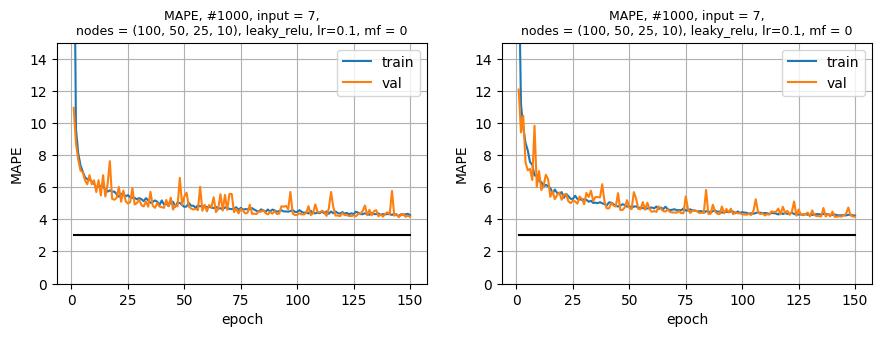

In [51]:
batch_size = 1000
input_shape = 7
node_settings = [(100,50,25,10), (100,50,25,10)]
activation = 'leaky_relu'
learning_rates = [0.1]
momentum_fs = [0]
epochs = 150

plot_RMSLE_MAPE(batch_size, input_shape, node_settings, activation, learning_rates, momentum_fs, epochs, working_dir, 'model_9_train_MAPE.csv', 'model_9_val_MAPE.csv',
           target = 3, ymax = 15)

*Observations*

It is shown that batch normalization significantly stabilizes the validation error.

**Model without rescaling layer**

Model optimization is done from beginning on using a "rescaling layer" for the model inputs using "Min-Max-normalization" per feature and hence setting the inputs to a range of -1 to +1. Practical effect should be very comparable to batch normalization.

In [ ]:
def model_builder_wo_rs(input_shape, node_setting, activation, learning_rate, momentum_f):
  """
  model_builder_wo_rs is function to define neural network model without rescaling layer with Nesterov momentum as learning function.

  :input_shape: number of features
  :node_setting: tupel representing hidden layers with number of nodes
  :activation: either "relu" or "leaky relu"
  :learning_rate
  :momentum_f: factor to define the momentum relative to the learning rate

  :return: model
  """

  no_hid_layer = len(node_setting)

  if activation == 'leaky_relu':
    activation = partial(tf.nn.leaky_relu, alpha=0.02)


  inputs = tf.keras.Input(shape=(input_shape,))
  x = inputs

  if no_hid_layer in [2, 4, 6, 8]:
    x = hidden_block(x, node_setting[0], node_setting[1], activation)

    if no_hid_layer in [4, 6, 8]:
      x = hidden_block(x, node_setting[2], node_setting[3], activation)

      if no_hid_layer in [6, 8]:
        x = hidden_block(x, node_setting[4], node_setting[5], activation)

        if no_hid_layer in [8]:
          x = hidden_block(x, node_setting[6], node_setting[7], activation)

  outputs = output_block(x)

  model = tf.keras.Model(inputs=inputs, outputs=outputs)



  model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate, momentum = learning_rate * momentum_f, nesterov=True),
                loss=tf.keras.losses.MeanSquaredLogarithmicError,
                metrics = [tf.keras.metrics.MeanSquaredLogarithmicError, tf.keras.metrics.MeanAbsolutePercentageError()])

  return model

In [ ]:
model_builder = model_builder_wo_rs
batch_size = 1000
input_shape = 7
node_settings = [(100,50,25,10), (100,50,25,10)]
activation = 'leaky_relu'
learning_rates = [0.1]
momentum_fs = [0]
epochs = 150
output = 'model_10'

optimize(model_builder, batch_size, input_shape, node_settings, activation, learning_rates, momentum_fs, epochs, working_dir, output)

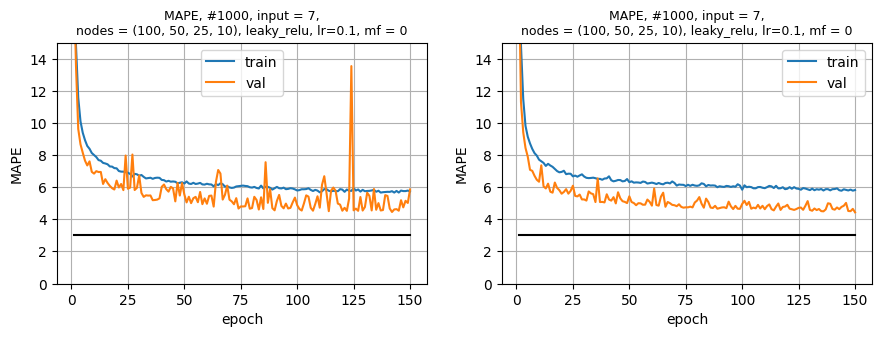

In [52]:
batch_size = 1000
input_shape = 7
node_settings = [(100,50,25,10), (100,50,25,10)]
activation = 'leaky_relu'
learning_rates = [0.1]
momentum_fs = [0]
epochs = 150

plot_RMSLE_MAPE(batch_size, input_shape, node_settings, activation, learning_rates, momentum_fs, epochs, working_dir, 'model_10_train_MAPE.csv', 'model_10_val_MAPE.csv',
           target = 3, ymax = 15)

**Observations**

An instable validation error is observed when the "rescaling layer" is absent. Effect is comparable to batch normalization after each hidden layer.

**The final model and model diagnostics**

For the final model, target variable for the validation data set is predicted. Residual plots showing the residuals vs. the predicted value are generated to assess the model.

Function `plot_predict` is set up to compile and train as well as validate the model and save model history for the model metrics and the predictions for the validation data set in csv format.

In [ ]:
def plot_predict (train_ds, val_ds, test_ds, model_builder, batch_size, input_shape, node_setting, activation, learning_rate, momentum_f, epochs, working_dir, output):
  """
  plot_predict is function to compile and train as well as validate the model
  and save model history for model metrics and predictions for the validation data set in csv format.

  :train_ds: training dataset
  :val_ds: validation dataset
  :test_ds: test dataset

  :model_builder: model builder function
  :batch_size: batch size
  :input_shape: number of features
  :node_setting: tupel representing hidden layers with number of nodes
  :activation: either "relu" or "leaky relu"
  :learning_rate
  :momentum_f: factor to define the momentum relative to the learning rate
  :epochs: number of epochs
  :working_dir: working directory
  :output: name of output file

  :return: None
  """
  model = model_builder_adam(input_shape, node_setting, activation, learning_rate, momentum_f)
  print(model.summary())

  index = 1

  train_final = train_ds.shuffle(train_ds.cardinality()).batch(batch_size)

  if val_ds is not None:
    val_final = val_ds.batch(batch_size)
    history = model.fit(train_final, validation_data=val_final, epochs=epochs, verbose = 0)
  else:
    history = model.fit(train_final, epochs=epochs, verbose = 0)

  training_MSLE = {}
  training_MAPE = {}

  training_MSLE[(batch_size, input_shape, node_setting, activation, learning_rate, momentum_f, index)] = history.history['mean_squared_logarithmic_error']
  training_MAPE[(batch_size, input_shape, node_setting, activation, learning_rate, momentum_f, index)] = history.history['mean_absolute_percentage_error']

  pd.DataFrame(training_MSLE).to_csv(os.path.join(working_dir, f'{output}_train_MSLE.csv'))
  pd.DataFrame(training_MAPE).to_csv(os.path.join(working_dir, f'{output}_train_MAPE.csv'))

  if val_ds is not None:
    validation_MSLE = {}
    validation_MAPE = {}

    validation_MSLE[(batch_size, input_shape, node_setting, activation, learning_rate, momentum_f, index)] = history.history['val_mean_squared_logarithmic_error']
    validation_MAPE[(batch_size, input_shape, node_setting, activation, learning_rate, momentum_f, index)] = history.history['val_mean_absolute_percentage_error']

    pd.DataFrame(validation_MSLE).to_csv(os.path.join(working_dir, f'{output}_val_MSLE.csv'))
    pd.DataFrame(validation_MAPE).to_csv(os.path.join(working_dir, f'{output}_val_MAPE.csv'))

  test_final = test_ds.batch(batch_size)
  prediction = model.predict(test_final)
  df_prediction = pd.DataFrame(data = {'Calories' : prediction.flatten()})
  df_prediction.to_csv(os.path.join(working_dir, f'{output}_prediction.csv'), index = False)


Final model
- uses all features (no reduction as overfitting not observed)
- consists of an input layer
- inputs are rescaled using "min-max normalization"
- consists of 4 hidden layers using "leaky relu" as activation function
- each hidden layer is followed by a batch normalization layer
- the number of nodes per hidden layer are 100, 50, 25, 10
- consists of an output layer using "relu" as an activation function
- batch size is defined with 1000
- learning function is "adam" with learning rate of 0.001
- training is conducted for at least 125 epochs

In [ ]:
train_ds = train_dataset
val_ds = val_dataset
test_ds = val_dataset

model_builder = model_builder_adam
batch_size = 1000
input_shape = 7
node_setting = (100,50,25,10)
activation = 'leaky_relu'
learning_rate = 0.001
momentum_f = 0
epochs = 200
output = 'model_final'

plot_predict(train_ds, val_ds, test_ds, model_builder, batch_size, input_shape, node_setting, activation, learning_rate, momentum_f, epochs, working_dir, output)

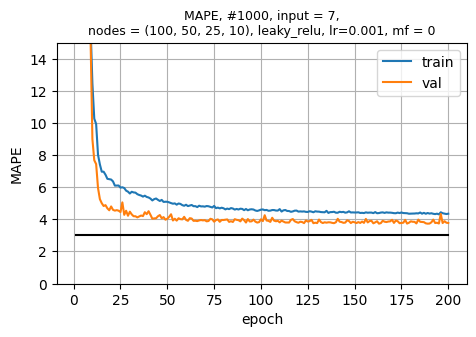

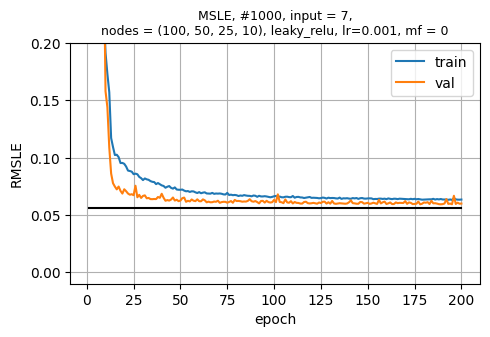

In [53]:
batch_size = 1000
input_shape = 7
node_settings = [(100,50,25,10)]
activation = 'leaky_relu'
learning_rates = [0.001]
momentum_fs = [0]
epochs = 200

plot_RMSLE_MAPE(batch_size, input_shape, node_settings, activation, learning_rates, momentum_fs, epochs, working_dir, 'model_final_train_MAPE.csv', 'model_final_val_MAPE.csv',
           target = 3, ymax = 15)
plot_RMSLE_MAPE(batch_size, input_shape, node_settings, activation, learning_rates, momentum_fs, epochs, working_dir, 'model_final_train_MSLE.csv', 'model_final_val_MSLE.csv',
           target = 0.056, ymax = 0.2)

In [ ]:
prediction_df = pd.read_csv(os.path.join(working_dir, 'model_final_prediction.csv'), header=[0])
sample_size = 500
prediction_sample = prediction_df['Calories'].values[:sample_size]
val_labels_sample = val_labels[:sample_size]
residuals_sample = prediction_sample - val_labels_sample
log_residuals_sample = np.log((1 + prediction_sample)/(1 + val_labels_sample))



In [ ]:
def residual_plot(residuals_sample, res_name):
  """
  residual_plot is a function to compile the residual plot with residuals vs. actual values

  :residuals_sample: np.array, list with residuals for y axis
  :res_name: name of residual

  :return: None

  """
  fig = plt.gcf()
  fig.set_size_inches( 4.5, 3)

  plt.scatter(prediction_sample, residuals_sample, s = 4)
  plt.plot([np.min(prediction_sample),np.max(prediction_sample)], [0,0], color = 'black')
  plt.title(f'{res_name}')
  plt.xlabel("Predicted Values for Calories")
  plt.ylabel(res_name)
  plt.grid()

  plt.tight_layout()
  plt.show()

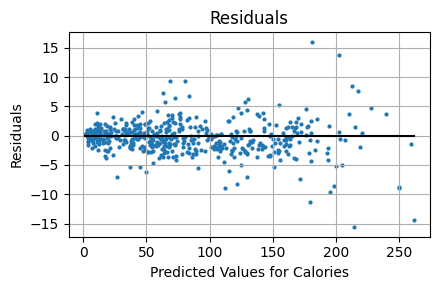

In [ ]:
residual_plot(residuals_sample, 'Residuals') #Residual plots

*Observations*

Residuals are well centered around 0, but are higher, the higher the predicted value.
This is reasoned in the chosen model metric RMSLE. Using RMSLE the ratio predicted value/actual value is minimized. The same ratio predicted value/actual value is obtained for e.g. a predicted value of 11 and a actual value of 10 as well a predicted value of 110 and a actual value of 100.
This means that the absolute difference is much higher for high target values.

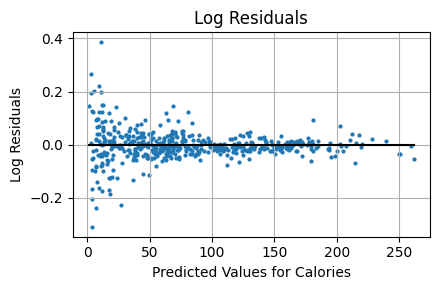

In [ ]:
residual_plot(log_residuals_sample, 'Log Residuals') #Log residual plots

Log residuals of ratio predicted value/ actual value are well centered around 0, but are lower, the higher the predicted value.
Although this particular metric is minimized, minimization is difficult for low `Calory`consumptions. It is difficult to predict low values that precise that the ratio is likewise small than for high 'Calories`.

## <span style = "color: red" > Summary and Conclusion

Goal is to predict the calory consumption for a workout. Different body metrics, like e.g. `Sex`, `Age` and `Heart_Rate` or also the `Duration` of the workout can be used as predictor.

Trainings dataset consists of 750.000 observations.
Test dataset consists of of 250.000 observations.

No missing values are in the dataset.

Features are categorical variable `Sex` and continous variables `Age`, `Height`, `Weight`, `Duration`, `Heart_Rate`, `Body_Temp`.
Target is the continous variable `Calories`.

Among all variables, `Duration`, `Heart_Rate`, `Body_Temp` show high positive correlation to each other and are also highly correlated to the target variable `Calories`.

Training and test dataset have a very similar distribution. Some individual outliers are in both datasets.

DBScan was applied to identify contextual outliers not following the correlation pattern. A very few outliers were removed, likely not impacting model fit.

Model optimization activities and hyperparameter tuning are summarized in the following table.

| Building block or hyperparameter | Investigated range|Setting | Impact | Effect |
|------------------------------|----------|-------------|------|---------|
| Rescaling layer| without + with |with|+++  |Rescaling stabilizes validation error. |
| Batch normalization layer| without + with |with|+++  |Batch normalization layer stabilizes validation error.|
| Activation function| "relu" + "leaky relu"     |"leaky relu"| + |"leaky relu" results in slighly lower validation error. |
| Number hidden layers| 4, 6, 8 |4   | - |No effect, as long as number of trainable parameter sufficient.|
| Nodes per layer| 10 to 500  |100, 50, 25, 10   |+  |No. of trainable parameter should be sufficient ~7.800|
| Learning function| "Nesterov momentum" + "Adam"    |"Adam"|++  |"Adam" leads to lower validation error.|
| Learning rate   | "Nesterov momentum": 0.05-0.5, "Adam": 0.0.0002 - 0.005|0.001| +++ |Learning rate has an optimum. <br>- too low, optimum not reached <br>- too high, validation error is unstable|
| Batch size   | 1000 + 5000|1000|  -|No impact in investigated range.|
| No of epochs | up to 200 |at least 125| + | At least 125 with adequate learning rate. <br>Overfitting not possible. |

The validation error of the optimized model is close to the irreducible error as the the model is very stable when model architecture and hyperparameter are modified. For the validation data set MAPE is ~3.8%, for the training data set ~4.3%. It is consistently seen that the validation error is below the training error. By chance, this can happen in a random split of the data into training and validation dataset.

## <span style = "color: red" > Prediction for *Kaggle* Test Data Set

Model training is repeated on the full training data set. Predictions for the test data set are made. In order to improve *Kaggle* score, 100 predictions were made and averaged. For this model was trained for 125 epochs and after every 5th epochs, `Calories` were predicted.

In [ ]:
train_examples_all = train_all_clean_array[:, :-1]
train_labels_all = train_all_clean_array[:, -1]

test_array = transform_df_to_array(test.copy())

train_dataset_all = tf.data.Dataset.from_tensor_slices((train_examples_all, train_labels_all))
test_dataset = tf.data.Dataset.from_tensor_slices(test_array)

for feat, targ in train_dataset_all.take(5):
  display('Features: {}, Target: {}'.format(feat, targ))

for feat in test_dataset.take(5):
  display('Features: {}'.format(feat))

'Features: [  1.   40.  187.   91.   23.   98.   40.8], Target: 129.0'

'Features: [  0.   61.  165.   67.   29.  105.   41.2], Target: 190.0'

'Features: [  1.   31.  176.   76.   24.  107.   40.5], Target: 143.0'

'Features: [  0.   53.  162.   63.   10.   95.   39.6], Target: 53.0'

'Features: [  0.   55.  168.   66.   23.  108.   40.5], Target: 151.0'

'Features: [  1.   45.  177.   81.    7.   87.   39.8]'

'Features: [  1.   26.  200.   97.   20.  101.   40.5]'

'Features: [  0.   29.  188.   85.   16.  102.   40.4]'

'Features: [  0.   39.  172.   73.   20.  107.   40.6]'

'Features: [  0.   30.  173.   67.   16.   94.   40.5]'

In [ ]:
train_ds = train_dataset_all
val_ds = None
test_ds = test_dataset

model_builder = model_builder_adam
batch_size = 1000
input_shape = 7
node_setting = (100,50,25,10)
activation = 'leaky_relu'
learning_rate = 0.001
momentum_f = 0
epochs = 250
output = 'model_final_all'


plot_predict(train_ds, val_ds, test_ds, model_builder, batch_size, input_shape, node_setting, activation, learning_rate, momentum_f, epochs, working_dir, output)



In [ ]:
prediction_df_all = pd.read_csv(os.path.join(working_dir, 'model_final_all_prediction.csv'), header=[0])
prediction_all = prediction_df_all['Calories'].values
start_index = 750000
df_sample_submission = pd.DataFrame(data = {'id' : np.arange(start_index, len(prediction_all) + start_index), 'Calories' : prediction_all.flatten()})
df_sample_submission.to_csv(os.path.join(working_dir, 'sample_submission.csv'), index = False)

In [ ]:
df_sample_submission.head()

id    Calories
0  750000   27.475084
1  750001  107.730450
2  750002   87.540726
3  750003  124.990790
4  750004   76.072360

**"Fancy trial"**

In order to improve *Kaggle* score, 200 predictions were made and averaged. Model was trained for 250 epochs and after every 2nd epoch, `Calories` were predicted.

In [ ]:
train_ds = train_dataset_all
val_ds = None
test_ds = test_dataset

model_builder = model_builder_adam
batch_size = 1000
input_shape = 7
node_setting = (100,50,25,10)
activation = 'leaky_relu'
learning_rate = 0.001
momentum_f = 0
epochs = 250

######################################
iterations = 200
predictions = np.zeros((iterations, len(test_dataset)))

model = model_builder_adam(input_shape, node_setting, activation, learning_rate, momentum_f)
print(model.summary())


train_final = train_ds.shuffle(train_ds.cardinality()).batch(batch_size)
test_final = test_ds.batch(batch_size)

model.fit(train_final, epochs=epochs, verbose = 0)

for i in range(iterations):
  model.save_weights(os.path.join(working_dir, 'model_fancy_trial.weights.h5'))
  predictions[i,:] = model.predict(test_final).flatten()

  model.load_weights(os.path.join(working_dir, 'model_fancy_trial.weights.h5'))
  model.fit(train_final, epochs=2, verbose = 0)


prediction_all = np.mean(predictions, axis = 0)
start_index = 750000
df_sample_submission = pd.DataFrame(data = {'id' : np.arange(start_index, len(prediction_all) + start_index), 'Calories' : prediction_all.flatten()})
df_sample_submission.to_csv(os.path.join(working_dir, 'sample_submission_fancy_250.csv'), index = False)



In [ ]:
df_sample_submission.head()

id    Calories
0  750000   27.368578
1  750001  107.413811
2  750002   87.160953
3  750003  125.438863
4  750004   75.978227

*Kaggle* RMSLE: 0.05938 (top 35% in the competition - 1497th of 4316) 😀


## <span style = "color: red" > Literature

- https://www.kaggle.com/competitions/playground-series-s5e5/overview
- Data Mining: Concepts and Techniques by Jiawei Han, Micheline Kamber, and Jian Pei. Published by Morgan Kaufmann Publishers, 3rd edition, 2012
- https://www.datacamp.com/de/tutorial/dbscan-clustering-algorithm?dc_referrer=https%3A%2F%2Fwww.bing.com%2F
- https://en.wikipedia.org/wiki/Feature_scaling
- https://medium.com/analytics-vidhya/root-mean-square-log-error-rmse-vs-rmlse-935c6cc1802a
- https://machinelearningmastery.com/gradient-descent-with-nesterov-momentum-from-scratch/
- https://www.baeldung.com/cs/adam-optimizer

